# LT 3 (Final Version)
v1.01  
*Changes: edited the text in 3a)*

#### Instructor

Joseph Benjamin R. Ilagan  
ITMGT 25 EE

#### Group Members:
    

1)  Mikaela Aquino   
2)  Kirsten Cuenco   
3)  Jay Lui  
4)  Nygel Ramos  
5)  Paris Tan  

Please submit through your group's Github Repository on or before **Thursday, 25 July 2019**, at **1:00PM**. 

Submission time be based on the email I will receive indicating that you have already uploaded your work for checking. 

If I don't receive any email from you, I will not check your answers. Any work submitted after **3:00 PM** will not be checked. Also, any work submitted after 1:00PM will have a maximum grade of 180 (out of the 200 total for the whole exam).

This time, I will not consider the timestamps in the repository as basis.

## Exploratory Data Analysis of Spotify track popularity in the Philippines

We will explore Spotify Philippines Top Hits data over the past year.

Spotify has made data available to the public through dedicated websites (for Charts) and through their Developer APIs.

Comma-Separated Value (CSV) files containing weekly Top 200 tracks from the [Spotify Charts](https://spotifycharts.com/regional/ph/weekly/latest) site have been downloaded for you and could be found in the **spotify_data** subdirectory.

### 1) Setup

Let's get a list of these csv files. Run the next two cells below.

In [1]:
import os
import re

In [2]:
file_dir = "./spotify_data"
file_list = os.listdir(file_dir)

#Filter to only .csv files
file_list = [f for f in filter(lambda x: re.search(r"\.csv$", x) , file_list)]

#Add directory prefix
file_list = [file_dir+"/"+f for f in file_list]
file_list

['./spotify_data/regional-ph-weekly-2018-08-03--2018-08-10.csv',
 './spotify_data/regional-ph-weekly-2018-08-17--2018-08-24.csv',
 './spotify_data/regional-ph-weekly-2018-09-21--2018-09-28.csv',
 './spotify_data/regional-ph-weekly-2019-02-01--2019-02-08.csv',
 './spotify_data/regional-ph-weekly-2019-05-24--2019-05-31.csv',
 './spotify_data/regional-ph-weekly-latest.csv',
 './spotify_data/regional-ph-weekly-2018-11-16--2018-11-23.csv',
 './spotify_data/regional-ph-weekly-2018-12-28--2019-01-04.csv',
 './spotify_data/regional-ph-weekly-2018-11-23--2018-11-30.csv',
 './spotify_data/regional-ph-weekly-2019-02-22--2019-03-01.csv',
 './spotify_data/regional-ph-weekly-2019-04-19--2019-04-26.csv',
 './spotify_data/regional-ph-weekly-2019-05-03--2019-05-10.csv',
 './spotify_data/regional-ph-weekly-2019-06-14--2019-06-21.csv',
 './spotify_data/regional-ph-weekly-2018-12-07--2018-12-14.csv',
 './spotify_data/regional-ph-weekly-2019-03-01--2019-03-08.csv',
 './spotify_data/regional-ph-weekly-2019-

We shall now load all csvs as one dataframe. Run the next few cells below.

In [3]:
import pandas as pd

In [4]:
# exclude first row per file
def load_csv(file_name):
    df = pd.read_csv(file_name, skiprows=1)
    df["file_name"] = file_name
    return df
    
df = pd.concat(map(load_csv, file_list))

In [5]:
df.head()

Position                      Track Name        Artist  Streams  \
0         1                  In My Feelings         Drake  2019924   
1         2  Girls Like You (feat. Cardi B)      Maroon 5  1364147   
2         3                           Mundo  IV Of Spades  1221053   
3         4                Thru These Tears          LANY  1189694   
4         5                    Kathang Isip       Ben&Ben  1165877   

                                                 URL  \
0  https://open.spotify.com/track/2G7V7zsVDxg1yRs...   
1  https://open.spotify.com/track/7fa9MBXhVfQ8P8D...   
2  https://open.spotify.com/track/4u8RkgV6P4TLi89...   
3  https://open.spotify.com/track/4gB61mP4tNChn4L...   
4  https://open.spotify.com/track/3WUEs51GpcvlgU7...   

                                           file_name  
0  ./spotify_data/regional-ph-weekly-2018-08-03--...  
1  ./spotify_data/regional-ph-weekly-2018-08-03--...  
2  ./spotify_data/regional-ph-weekly-2018-08-03--...  
3  ./spotify_data/regional-ph-weekly-2018-08-03--...  
4  ./spotify_data/regional-ph-weekly-2018-08-03--...

In [6]:
df.tail()

Position                  Track Name            Artist  Streams  \
195       196  Rumors (with Sofia Carson)             R3HAB   143865   
196       197           Never Be the Same    Camila Cabello   143720   
197       198              Meron Nang Iba  Silent Sanctuary   143468   
198       199              Sunday Morning          Maroon 5   143314   
199       200               What is Love?             TWICE   143116   

                                                   URL  \
195  https://open.spotify.com/track/4hIhoGN4UTZdNpH...   
196  https://open.spotify.com/track/4eWQlBRaTjPPUlz...   
197  https://open.spotify.com/track/4r7vGTk9HCW7YDo...   
198  https://open.spotify.com/track/5qII2n90lVdPDcg...   
199  https://open.spotify.com/track/5Ek40FyMPprcvty...   

                                             file_name  
195  ./spotify_data/regional-ph-weekly-2018-09-14--...  
196  ./spotify_data/regional-ph-weekly-2018-09-14--...  
197  ./spotify_data/regional-ph-weekly-2018-09-14--...  
198  ./spotify_data/regional-ph-weekly-2018-09-14--...  
199  ./spotify_data/regional-ph-weekly-2018-09-14--...

In [7]:
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name'], dtype='object')

Note that the csv files don't have a lot of information in them.

Extract the beginning and ending days (yyyy-mm-dd) of the week as found in the file name.

The file names do have some bits of information we can use later. We can extract beginning and ending days of the week. Let's do that now. Run the cell below.

In [8]:
# Get beginning and ending days (yyyy-mm-dd) of the week as found in the file name
extracted_df = df.loc[:,"file_name"].str.extract(r"([0-9]{4}\-[0-9]{2}\-[0-9]{2})\--([0-9]{4}\-[0-9]{2}\-[0-9]{2})")
extracted_df.columns = ["begin_date","end_date"]
extracted_df.head()

begin_date    end_date
0  2018-08-03  2018-08-10
1  2018-08-03  2018-08-10
2  2018-08-03  2018-08-10
3  2018-08-03  2018-08-10
4  2018-08-03  2018-08-10

Add this new dataframe to the existing one. Go ahead and run the next cell.

In [9]:
#Add new columns to dataframe
df = pd.concat([df,extracted_df],axis=1)
df.head()

Position                      Track Name        Artist  Streams  \
0         1                  In My Feelings         Drake  2019924   
1         2  Girls Like You (feat. Cardi B)      Maroon 5  1364147   
2         3                           Mundo  IV Of Spades  1221053   
3         4                Thru These Tears          LANY  1189694   
4         5                    Kathang Isip       Ben&Ben  1165877   

                                                 URL  \
0  https://open.spotify.com/track/2G7V7zsVDxg1yRs...   
1  https://open.spotify.com/track/7fa9MBXhVfQ8P8D...   
2  https://open.spotify.com/track/4u8RkgV6P4TLi89...   
3  https://open.spotify.com/track/4gB61mP4tNChn4L...   
4  https://open.spotify.com/track/3WUEs51GpcvlgU7...   

                                           file_name  begin_date    end_date  
0  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10  
1  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10  
2  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10  
3  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10  
4  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10

Notice the two new columns `begin_date` and `end_date` to the right of the dataframe.

#### 1a) Extract Track IDs

Spotify tracks are assigned a Track ID, which can be seen embedded in the URL data above. 

The hash-looking characters to the right of "https://open.spotify.com/track/" are the Track IDs. These are what we will extract next.

**Your turn:**

Let's extract that into its own column called **"Track ID"** in the dataframe.

**(10 points)**

In [10]:
## write your code below.
## remnants of tests from the previous run are shown on the output area for your reference.

track_ID_df = df.loc[:,"URL"].str.extract(r"([A-Za-z0-9]{22}$)")
track_ID_df.columns = ["Track ID"]
track_ID_df.head()

track_ID_df.loc[:,"Track ID"]

0      2G7V7zsVDxg1yRsu7Ew9RJ
1      7fa9MBXhVfQ8P8Df9OEbD8
2      4u8RkgV6P4TLi89SmlUtv8
3      4gB61mP4tNChn4LgfquMhi
4      3WUEs51GpcvlgU7lehLgLh
5      2BgD4nRyx9EZ5o8YEnjRSV
6      3VQb0rq27GPX92X53Ni1Lc
7      6SFStUDQZNaGPKWOx9ZiJB
8      5WvAo7DNuPRmk4APhdPzi8
9      2CWnuF7ht55Ajyeg4WPvWu
10     0ztDBQdQmdVZvorSmIjMih
11     3u1S1OmAUhx5DRlLrXqyp3
12     0d2iYfpKoM0QCKvcLCkBao
13     00mBzIWv5gHOYxwuEJXjOG
14     7gkWXbAxIYuvtOpcN3p9GJ
15     4Is1b37KJY9XVCgzp81FBW
16     3BPoSr2pO34Aan6alFfVto
17     4keoy2fqgwGnbWlm3ZVZFa
18     3nc420PXjTdBV5TN0gCFkS
19     10Igtw8bSDyyFs7KIsKngZ
20     04ZTP5KsCypmtCmQg5tH9R
21     6LJ1p1h5EcMK4VPeCLDSoF
22     4hQ6UGyWQIGJmHSo0J88JW
23     76cy1WJvNGJTj78UqeA5zr
24     0WOvSEVpUGkNufX0w0M06F
25     2RttW7RAu5nOAfq6YFvApB
26     09IStsImFySgyp0pIQdqAc
27     6NFKf8vBApSvtzkapYmnVR
28     3T4UodGkfZObJ43RtA5KFU
29     6kPJZM97LwdG9QIsT7khp6
                ...          
170    6lanRgr6wXibZr8KgzXxBl
171    6qAzAmPBUpGrk7XADZHR5k
172    57k

In [11]:
## check your work here
## remnants of the output from a previous run are shown below for reference

df = pd.concat([df,track_ID_df],axis=1)
df.head()


Position                      Track Name        Artist  Streams  \
0         1                  In My Feelings         Drake  2019924   
1         2  Girls Like You (feat. Cardi B)      Maroon 5  1364147   
2         3                           Mundo  IV Of Spades  1221053   
3         4                Thru These Tears          LANY  1189694   
4         5                    Kathang Isip       Ben&Ben  1165877   

                                                 URL  \
0  https://open.spotify.com/track/2G7V7zsVDxg1yRs...   
1  https://open.spotify.com/track/7fa9MBXhVfQ8P8D...   
2  https://open.spotify.com/track/4u8RkgV6P4TLi89...   
3  https://open.spotify.com/track/4gB61mP4tNChn4L...   
4  https://open.spotify.com/track/3WUEs51GpcvlgU7...   

                                           file_name  begin_date    end_date  \
0  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   
1  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   
2  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   
3  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   
4  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   

                 Track ID  
0  2G7V7zsVDxg1yRsu7Ew9RJ  
1  7fa9MBXhVfQ8P8Df9OEbD8  
2  4u8RkgV6P4TLi89SmlUtv8  
3  4gB61mP4tNChn4LgfquMhi  
4  3WUEs51GpcvlgU7lehLgLh

### 2) Working with Master Data

We need more detailed information about the things of significance we are analyzing. In particular, we need to know more about the individual tracks (including audio features such as energy, danceability, or speechiness) and artists (including name and genres). 

Spotify provides an Application Programming Interface (API) to allow software developers to access these pieces of information through web services. 

We've previously used these APIs to extract master data based on the specific tracks found in the PH Top 200 weekly data loaded in the dataframe above. 

We shall now load tracks from JSON file **tracks.json**. The data was previously extracted via the Spotify Web API.

The keys and values are taken from the [Spotify Web API Documentation Page](https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/).

<table>
  <thead>
    <tr>
      <th>Key</th>
      <th>Value Type</th>
      <th>Value Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>album</td>
      <td>a simplified <a href="/documentation/web-api/reference/object-model/#album-object-simplified">album object</a></td>
      <td>The album on which the track appears. The album object includes a link in <code class="highlighter-rouge">href</code> to full information about the album.</td>
    </tr>
    <tr>
      <td>artists</td>
      <td>an array of simplified <a href="/documentation/web-api/reference/object-model/#artist-object-simplified">artist objects</a></td>
      <td>The artists who performed the track. Each artist object includes a link in <code class="highlighter-rouge">href</code> to more detailed information about the artist.</td>
    </tr>
    <tr>
      <td>available_markets</td>
      <td>array of strings</td>
      <td>A list of the countries in which the track can be played, identified by their <a href="http://en.wikipedia.org/wiki/ISO_3166-1_alpha-2">ISO 3166-1 alpha-2</a> code.</td>
    </tr>
    <tr>
      <td>disc_number</td>
      <td>integer</td>
      <td>The disc number (usually <code class="highlighter-rouge">1</code> unless the album consists of more than one disc).</td>
    </tr>
    <tr>
      <td>duration_ms</td>
      <td>integer</td>
      <td>The track length in milliseconds.</td>
    </tr>
    <tr>
      <td>explicit</td>
      <td>Boolean</td>
      <td>Whether or not the track has explicit lyrics ( <code class="highlighter-rouge">true</code> = yes it does; <code class="highlighter-rouge">false</code> = no it does not OR unknown).</td>
    </tr>
    <tr>
      <td>external_ids</td>
      <td>an <a href="/documentation/web-api/reference/object-model/#external-id-object">external ID object</a></td>
      <td>Known external IDs for the track.</td>
    </tr>
    <tr>
      <td>external_urls</td>
      <td>an <a href="/documentation/web-api/reference/object-model/#external-url-object">external URL object</a></td>
      <td>Known external URLs for this track.</td>
    </tr>
    <tr>
      <td>href</td>
      <td>string</td>
      <td>A link to the Web API endpoint providing full details of the track.</td>
    </tr>
    <tr>
      <td>id</td>
      <td>string</td>
      <td>The <a href="/documentation/web-api/#spotify-uris-and-ids">Spotify ID</a> for the track.</td>
    </tr>
    <tr>
      <td>is_playable</td>
      <td>boolean</td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied. If <code class="highlighter-rouge">true</code> , the track is playable in the given market. Otherwise <code class="highlighter-rouge">false</code>.</td>
    </tr>
    <tr>
      <td>linked_from</td>
      <td>a <a href="/documentation/web-api/reference/object-model/#track-link">linked track object</a></td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied, and the requested track has been replaced with different track. The track in the <code class="highlighter-rouge">linked_from</code> object contains information about the originally requested track.</td>
    </tr>
    <tr>
      <td>restrictions</td>
      <td>a restrictions object</td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied, the original track is not available in the given market, and Spotify did not have any tracks to relink it with. The track response will still contain metadata for the original track, and a restrictions object containing the reason why the track is not available: <code class="highlighter-rouge">"restrictions" : {"reason" : "market"}</code></td>
    </tr>
    <tr>
      <td>name</td>
      <td>string</td>
      <td>The name of the track.</td>
    </tr>
    <tr>
      <td>popularity</td>
      <td>integer</td>
      <td>The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.<br />The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.<br />Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.</td>
    </tr>
    <tr>
      <td>preview_url</td>
      <td>string</td>
      <td>A link to a 30 second preview (MP3 format) of the track. Can be <code class="highlighter-rouge">null</code></td>
    </tr>
    <tr>
      <td>track_number</td>
      <td>integer</td>
      <td>The number of the track. If an album has several discs, the track number is the number on the specified disc.</td>
    </tr>
    <tr>
      <td>type</td>
      <td>string</td>
      <td>The object type: “track”.</td>
    </tr>
    <tr>
      <td>uri</td>
      <td>string</td>
      <td>The <a href="/documentation/web-api/#spotify-uris-and-ids">Spotify URI</a> for the track.</td>
    </tr>
  </tbody>
</table>

Let's go ahead and load these files.

In [12]:
import json

with open(file_dir+"/tracks.json","r") as tracks_file:
    tracks = json.load(tracks_file)

In [13]:
# display first 20 tracks only
tracks[:20]

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
     'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
     'id': '3TVXtAsR1Inumwj472S9r4',
     'name': 'Drake',
     'type': 'artist',
     'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/1ATL5GLyefJaxhQzSPVrLX'},
   'href': 'https://api.spotify.com/v1/albums/1ATL5GLyefJaxhQzSPVrLX',
   'id': '1ATL5GLyefJaxhQzSPVrLX',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/542d705154be4049fc927050d006987e63739bbd',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn.co/image/239ec906572231368d8ebd72614094bd3bd10b33',
     'width': 300},
    {'height': 64,
     'url': 'https://i.scdn.co/image/f12257240bbec6ddfa780253ac939e646eba2a36',
     'width': 64}],
   'name': 'Scorpion',
   'release_date': '2018-06-29',
   'release_date_precision': 

Let's compare the **original_id** and the **id** of the track master data. You'll note that some entries don't match, and this may cause problems when you try cross-referencing what is included in Spotify Charts data and what's actually included in the API data. Go on, run the next cell.

In [14]:
[(t["original_id"],t["id"]) for t in tracks]

[('2G7V7zsVDxg1yRsu7Ew9RJ', '2G7V7zsVDxg1yRsu7Ew9RJ'),
 ('7fa9MBXhVfQ8P8Df9OEbD8', '7fa9MBXhVfQ8P8Df9OEbD8'),
 ('4u8RkgV6P4TLi89SmlUtv8', '4u8RkgV6P4TLi89SmlUtv8'),
 ('4gB61mP4tNChn4LgfquMhi', '7GbAp0HKPQW7WnFJAzMoRk'),
 ('3WUEs51GpcvlgU7lehLgLh', '3WUEs51GpcvlgU7lehLgLh'),
 ('2BgD4nRyx9EZ5o8YEnjRSV', '2BgD4nRyx9EZ5o8YEnjRSV'),
 ('3VQb0rq27GPX92X53Ni1Lc', '6p6DiqAPwMX7vdrSo30wgo'),
 ('6SFStUDQZNaGPKWOx9ZiJB', '2BgEsaKNfHUdlh97KmvFyo'),
 ('5WvAo7DNuPRmk4APhdPzi8', '5WvAo7DNuPRmk4APhdPzi8'),
 ('2CWnuF7ht55Ajyeg4WPvWu', '7b8YOVV5quZcSKEijDgyWB'),
 ('0ztDBQdQmdVZvorSmIjMih', '0ztDBQdQmdVZvorSmIjMih'),
 ('3u1S1OmAUhx5DRlLrXqyp3', '3u1S1OmAUhx5DRlLrXqyp3'),
 ('0d2iYfpKoM0QCKvcLCkBao', '0d2iYfpKoM0QCKvcLCkBao'),
 ('00mBzIWv5gHOYxwuEJXjOG', '00mBzIWv5gHOYxwuEJXjOG'),
 ('7gkWXbAxIYuvtOpcN3p9GJ', '5OCJzvD7sykQEKHH7qAC3C'),
 ('4Is1b37KJY9XVCgzp81FBW', '4Is1b37KJY9XVCgzp81FBW'),
 ('3BPoSr2pO34Aan6alFfVto', '3BPoSr2pO34Aan6alFfVto'),
 ('4keoy2fqgwGnbWlm3ZVZFa', '4keoy2fqgwGnbWlm3ZVZFa'),
 ('3nc420P

#### 2a) Create a dictionary `tracks_dict` whose keys are the track ids (with attribute "id") and the values are dictionaries with the following attributes and values:

We need a fast, in-memory placeholder of tracks data where we could simply reference additional track attributes via some key (in our specific case, the Track ID, or rather, the Original ID). In Python, this can be achieved through a **dictionary**.

Recall that dictionaries can have subdictionaries in them. Create a dictionary whose keys are the original ids and the values are dictionaries containing the following attributes:

- "name" (Track Name)
- "duration_ms" (Duration in Milliseconds)
- "artist_id" (ID of the first artist in a list of artists)
- "artist_name" (Name of the first artist in a list of artists)

**(20 points)**


In [15]:
tracks_dict = {}

## write code below
## remnants from previous run are shown on the output below for your reference
## -----------------


for i in tracks:
    for j in i["artists"]:
        tracks_dict[i["original_id"]] = {"name":i["name"], "id":i["id"], "duration_ms":i["duration_ms"], "artist_id":i["artists"][0]["id"], "artist_name":i["artists"][0]["name"]}
    
tracks_dict




{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake'},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5'},
 '4u8RkgV6P4TLi89SmlUtv8': {'name': 'Mundo',
  'id': '4u8RkgV6P4TLi89SmlUtv8',
  'duration_ms': 349713,
  'artist_id': '4k9wp4ipHdA1bu1T4x1ZTG',
  'artist_name': 'IV Of Spades'},
 '4gB61mP4tNChn4LgfquMhi': {'name': 'Thru These Tears',
  'id': '7GbAp0HKPQW7WnFJAzMoRk',
  'duration_ms': 204515,
  'artist_id': '49tQo2QULno7gxHutgccqF',
  'artist_name': 'LANY'},
 '3WUEs51GpcvlgU7lehLgLh': {'name': 'Kathang Isip',
  'id': '3WUEs51GpcvlgU7lehLgLh',
  'duration_ms': 318814,
  'artist_id': '4DAcJXcjX0zlQAZAPAx4Zb',
  'artist_name': 'Ben&Ben'},
 '2BgD4nRyx9EZ5o8YEnjRSV': {'name': "Kung 'Di Rin Lang Ikaw",
  'id': '2BgD4n

In [16]:
# display tracks_dict to verify changes
## remnants from previous run shown below for your reference

## write code below
## ----------------
tracks_dict

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake'},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5'},
 '4u8RkgV6P4TLi89SmlUtv8': {'name': 'Mundo',
  'id': '4u8RkgV6P4TLi89SmlUtv8',
  'duration_ms': 349713,
  'artist_id': '4k9wp4ipHdA1bu1T4x1ZTG',
  'artist_name': 'IV Of Spades'},
 '4gB61mP4tNChn4LgfquMhi': {'name': 'Thru These Tears',
  'id': '7GbAp0HKPQW7WnFJAzMoRk',
  'duration_ms': 204515,
  'artist_id': '49tQo2QULno7gxHutgccqF',
  'artist_name': 'LANY'},
 '3WUEs51GpcvlgU7lehLgLh': {'name': 'Kathang Isip',
  'id': '3WUEs51GpcvlgU7lehLgLh',
  'duration_ms': 318814,
  'artist_id': '4DAcJXcjX0zlQAZAPAx4Zb',
  'artist_name': 'Ben&Ben'},
 '2BgD4nRyx9EZ5o8YEnjRSV': {'name': "Kung 'Di Rin Lang Ikaw",
  'id': '2BgD4n

---  


We will now load tracks from JSON file **audio_features.json**. The data was previously extracted via the Spotify Web API. The keys and values are taken from the description in the [Spotify Web API documentation page](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/). 

<table>
  <thead>
    <tr>
      <th>Key</th>
      <th>Value Type</th>
      <th>Value Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>acousticness</td>
      <td>float</td>
      <td>A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.</td>
    </tr>
    <tr>
      <td>analysis_url</td>
      <td>string</td>
      <td>An HTTP URL to access the full audio analysis of this track. An access token is required to access this data.</td>
    </tr>
    <tr>
      <td>danceability</td>
      <td>float</td>
      <td>Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.</td>
    </tr>
    <tr>
      <td>duration_ms</td>
      <td>int</td>
      <td>The duration of the track in milliseconds.</td>
    </tr>
    <tr>
      <td>energy</td>
      <td>float</td>
      <td>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.</td>
    </tr>
    <tr>
      <td>id</td>
      <td>string</td>
      <td>The Spotify ID for the track.</td>
    </tr>
    <tr>
      <td>instrumentalness</td>
      <td>float</td>
      <td>Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.</td>
    </tr>
    <tr>
      <td>key</td>
      <td>int</td>
      <td>The key the track is in. Integers map to pitches using standard <a href="https://en.wikipedia.org/wiki/Pitch_class">Pitch Class notation</a> . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.</td>
    </tr>
    <tr>
      <td>liveness</td>
      <td>float</td>
      <td>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.</td>
    </tr>
    <tr>
      <td>loudness</td>
      <td>float</td>
      <td>The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.</td>
    </tr>
    <tr>
      <td>mode</td>
      <td>int</td>
      <td>Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.</td>
    </tr>
    <tr>
      <td>speechiness</td>
      <td>float</td>
      <td>Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.</td>
    </tr>
    <tr>
      <td>tempo</td>
      <td>float</td>
      <td>The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.</td>
    </tr>
    <tr>
      <td>time_signature</td>
      <td>int</td>
      <td>An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).</td>
    </tr>
    <tr>
      <td>track_href</td>
      <td>string</td>
      <td>A link to the Web API endpoint providing full details of the track.</td>
    </tr>
    <tr>
      <td>type</td>
      <td>string</td>
      <td>The object type: “audio_features”</td>
    </tr>
    <tr>
      <td>uri</td>
      <td>string</td>
      <td>The Spotify URI for the track.</td>
    </tr>
    <tr>
      <td>valence</td>
      <td>float</td>
      <td>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).</td>
    </tr>
  </tbody>
</table>

Let's proceed with running the next few cells.

In [16]:
import json

with open(file_dir+"/audio_features.json","r") as audio_features_file:
    audio_features = json.load(audio_features_file)

In [17]:
audio_features[:20]

[{'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ'},
 {'danceability': 0.851,
  'energy': 0.541,
  'key': 0,
  'loudness': -6.825,
  'mode': 1,
  'speechiness': 0.0505,
  'acousticness': 0.568,
  'instrumentalness': 0,
  'liveness': 0.13,
  'valence': 0.448,
  'tempo': 124.959,
  'type': 'audio_features',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'uri': 'spotify:track:7fa9MBXhVfQ8P8Df9OEbD8',
  'track_href': 'https://api.spotify.com/v1/tracks/7fa9MBXhVfQ8P8Df9OE

#### 2b) Add audio features attributes to `tracks_dict`

For convenience, we shall update the `tracks_dict` dictionary with more attributes from the audio_features data we just uploaded.

Use the key 'original_id' as basis to update tracks_dict. Note that the `audio_features` dictionary entries also have the 'original_id' key so use that.

**Hint:** one way to do this is through the use of the `dict.update()` method. If we were not able to cover this in class, now is the time to do research.

**(10 points)**

In [18]:
## write code below
## --------------------

for i in tracks_dict:
    for a in audio_features:
        tracks_dict[a["original_id"]].update(a)
        
tracks_dict


{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ'},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5',
  'danceability': 0.851,
  'energy': 0.541,
  'key': 0,
  'loudness': -6.825,
  'mode':

In [24]:
# inspect tracks_dict to determine if the audio_features attributes have been carried over
tracks_dict

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ'},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5',
  'danceability': 0.851,
  'energy': 0.541,
  'key': 0,
  'loudness': -6.825,
  'mode':

After running the previous cell, you should notice the new subdictionary attributes included.

In [19]:
len(tracks_dict)

794

The number of tracks is visibly lower than the number of records we uploaded from the Charts data. This is understandable as we are now working with unique (original) Track IDs.

Finally, we will now load tracks from JSON file **artists.json**. The data was previously extracted via the Spotify Web API. Go ahead and run the next few cells.

In [20]:
import json

with open(file_dir+"/artists.json","r") as artists_file:
    artists = json.load(artists_file)

Let's take a look at the first 5 entries:

In [21]:
artists[:5]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6ydoSd3N2mwgwBHtF6K7eX'},
  'followers': {'href': None, 'total': 1349550},
  'genres': ['australian pop', 'pop'],
  'href': 'https://api.spotify.com/v1/artists/6ydoSd3N2mwgwBHtF6K7eX',
  'id': '6ydoSd3N2mwgwBHtF6K7eX',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/1134c6cc39953feb998c83d5a7356ce6d1548a5c',
    'width': 640},
   {'height': 320,
    'url': 'https://i.scdn.co/image/87e98ba41d0405dd4a0a5aeca6f5f1ffea5a29bf',
    'width': 320},
   {'height': 160,
    'url': 'https://i.scdn.co/image/c016cd05bbb2e12a1e5d6d40e6e38f27363eb038',
    'width': 160}],
  'name': 'Calum Scott',
  'popularity': 78,
  'type': 'artist',
  'uri': 'spotify:artist:6ydoSd3N2mwgwBHtF6K7eX'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/5qRSs6mvI17zrkJpOHkCoM'},
  'followers': {'href': None, 'total': 1907419},
  'genres': ['k-pop', 'k-pop boy group'],
  'href': 'https://api.spotify.com/v1/artists/5qRSs6mvI17z

#### 2c) Create a dictionary `artists_dict` whose keys are the artist ids (with attribute "id") and the values are dictionaries with the following attributes and values:

Similar to tracks, we need an easy mechanism to look up Artist master data simply by using the artist id as key.

Let's prepare a new dictionary `artists_dict` with the following attributes:

- "name" (Track Name)
- "genres" (Genres of the Artist)

Be careful to note that the value of `genres` is actually a list. This is perfectly fine in a dictionary setup, but be aware that there could be one or more genres attributed to each Artist.

**(10 points)**

In [22]:
## write code below
## ------------------------

artists_dict = {}

for b in artists:
    #for g in b["genres"]:
        artists_dict[b["id"]] = {"name":b["name"], "genres":b["genres"]}
        
artists_dict


{'6ydoSd3N2mwgwBHtF6K7eX': {'name': 'Calum Scott',
  'genres': ['australian pop', 'pop']},
 '5qRSs6mvI17zrkJpOHkCoM': {'name': 'iKON',
  'genres': ['k-pop', 'k-pop boy group']},
 '09Xydf4dlkr29dH99DmsvQ': {'name': 'Janine Teñoso', 'genres': ['opm']},
 '74KM79TiuVKeVCqs8QtB0B': {'name': 'Sabrina Carpenter',
  'genres': ['dance pop', 'pop', 'post-teen pop', 'viral pop']},
 '0DnjaQqb436AH1idffI6CQ': {'name': 'Yeng Constantino',
  'genres': ['classic opm', 'opm']},
 '6aiCKnIN68hohzU3ZzNq48': {'name': 'Sarah Geronimo',
  'genres': ['classic opm', 'opm']},
 '6k0IBR0lU42s2GYpNX7kA9': {'name': 'Brian McKnight',
  'genres': ['dance pop',
   'neo soul',
   'new jack swing',
   'quiet storm',
   'r&b',
   'urban contemporary']},
 '6USv9qhCn6zfxlBQIYJ9qs': {'name': 'Dominic Fike',
  'genres': ['alternative pop rock']},
 '4BNWanhw4AjSXjBm9L1Jzy': {'name': 'Juris', 'genres': ['classic opm', 'opm']},
 '5qa31A9HySw3T7MKWI9bGg': {'name': 'FLETCHER',
  'genres': ['dance pop',
   'electropop',
   'indie 

Let's inspect the new dictionary:

In [24]:
## remnants from previous run shown below for your reference
artists_dict

{'6ydoSd3N2mwgwBHtF6K7eX': {'name': 'Calum Scott',
  'genres': ['australian pop', 'pop']},
 '5qRSs6mvI17zrkJpOHkCoM': {'name': 'iKON',
  'genres': ['k-pop', 'k-pop boy group']},
 '09Xydf4dlkr29dH99DmsvQ': {'name': 'Janine Teñoso', 'genres': ['opm']},
 '74KM79TiuVKeVCqs8QtB0B': {'name': 'Sabrina Carpenter',
  'genres': ['dance pop', 'pop', 'post-teen pop', 'viral pop']},
 '0DnjaQqb436AH1idffI6CQ': {'name': 'Yeng Constantino',
  'genres': ['classic opm', 'opm']},
 '6aiCKnIN68hohzU3ZzNq48': {'name': 'Sarah Geronimo',
  'genres': ['classic opm', 'opm']},
 '6k0IBR0lU42s2GYpNX7kA9': {'name': 'Brian McKnight',
  'genres': ['dance pop',
   'neo soul',
   'new jack swing',
   'quiet storm',
   'r&b',
   'urban contemporary']},
 '6USv9qhCn6zfxlBQIYJ9qs': {'name': 'Dominic Fike',
  'genres': ['alternative pop rock']},
 '4BNWanhw4AjSXjBm9L1Jzy': {'name': 'Juris', 'genres': ['classic opm', 'opm']},
 '5qa31A9HySw3T7MKWI9bGg': {'name': 'FLETCHER',
  'genres': ['dance pop',
   'electropop',
   'indie 

In [23]:
len(artists_dict)

304

#### 2d) Add **artist_genre** attribute per track in the tracks_dict dictionary. 

We are assuming for now that tracks inherit directly the genre from the artist and that no tracks deviate from the artist's general genre.

Again, for convenience, let's beef up tracks_dict with more attributes, this time from the artist data we just prepared. Assign a new attribute "artist_genre" in `tracks_dict`.

**Hint:** Note that `tracks_dict` has an "artist_id" attribute; use this to look up the attributes from `artists_dict`.


**(15 points)**

In [24]:
## Write code below
## ----------------

for i in tracks_dict:
    for c in artists_dict:
        if tracks_dict[i]["artist_name"] == artists_dict[c]["name"]:
            tracks_dict[i].update({"artists_genre": artists_dict[c]["genres"]})




#### 2e) Inspect **tracks_dict** and verify that the entries now have the 'artist_genres' property.

**(3 points)**

In [25]:
tracks_dict

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'artists_genre': ['canadian hip hop',
   'canadian pop',
   'hip hop',
   'pop rap',
   'rap',
   'toronto rap']},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',


In [248]:
## remnants from previous run shown below for your reference





{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'artist_genres': ['canadian hip hop',
   'canadian pop',
   'hip hop',
   'pop rap',
   'rap',
   'toronto rap']},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',


In [26]:
# verify that the length of tracks_dict is still the same
len(tracks_dict)

794

### 3) More Data Transformation: Feature Extractions and Aggregations

We shall revisit our original dataframe and introduce additional columns to make our analysis and insights easier in the succeeding numbers.

Let's display the head of the dataframe `df` here again. Go ahead and run the next cell.

In [27]:
df.head()

Position                      Track Name        Artist  Streams  \
0         1                  In My Feelings         Drake  2019924   
1         2  Girls Like You (feat. Cardi B)      Maroon 5  1364147   
2         3                           Mundo  IV Of Spades  1221053   
3         4                Thru These Tears          LANY  1189694   
4         5                    Kathang Isip       Ben&Ben  1165877   

                                                 URL  \
0  https://open.spotify.com/track/2G7V7zsVDxg1yRs...   
1  https://open.spotify.com/track/7fa9MBXhVfQ8P8D...   
2  https://open.spotify.com/track/4u8RkgV6P4TLi89...   
3  https://open.spotify.com/track/4gB61mP4tNChn4L...   
4  https://open.spotify.com/track/3WUEs51GpcvlgU7...   

                                           file_name  begin_date    end_date  \
0  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   
1  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   
2  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   
3  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   
4  ./spotify_data/regional-ph-weekly-2018-08-03--...  2018-08-03  2018-08-10   

                 Track ID  
0  2G7V7zsVDxg1yRsu7Ew9RJ  
1  7fa9MBXhVfQ8P8Df9OEbD8  
2  4u8RkgV6P4TLi89SmlUtv8  
3  4gB61mP4tNChn4LgfquMhi  
4  3WUEs51GpcvlgU7lehLgLh

In [28]:
type(df)

pandas.core.frame.DataFrame

#### 3a) Add audio feature columns to the dataframe  

Let's add the following:
* Genres ("artist_genres" key will be mapped to "genres")
* Danceability ("danceability")
* Energy ("energy")
* Loudness ("loudness")
* Mode ("mode")
* Speechiness ("speechiness")
* Acousticness ("acousticness")
* Instrumentalness ("instrumentalness")
* Liveness ("liveness")
* Valence ("valence")
* Tempo ("tempo")

  
We will use the Pandas `df.apply(...)` with a lambda function method to perform this task. ~~The code to do this has already been provided.~~

We will create a new dataframe from the original one and then assign to new columns in the original dataframe.

~~All that's left for you to do is to verify the changes in the original dataframe.~~

**(15 points)**

In [29]:
df["Danceability"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["danceability"])
df["Energy"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["energy"])
df["Loudness"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["loudness"])
df["Mode"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["mode"])
df["Speechiness"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["speechiness"])
df["Acousticness"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["acousticness"])
df["Instrumentalness"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["instrumentalness"])
df["Liveness"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["liveness"])
df["Valence"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["valence"])
df["Tempo"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["tempo"])

df

Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                   Thru These Tears   
4           5                                       Kathang Isip   
5           6                             Kung 'Di Rin Lang Ikaw   
6           7                                        'Di Na Muli   
7           8                                               2002   
8           9                                         No Brainer   
9          10                            DDU-DU DDU-DU - KR Ver.   
10         11                                            Tagpuan   
11         12                                               Rise   
12         13                    Eastside (with Halsey & Khalid)   
13         14                              Sa Ngalan Ng Pag-Ibig   
14         15                                     God is a woman   
15         16                                               BAAM   
16         17                                        BBoom BBoom   
17         18                                          Happy Now   
18         19                               Ocean (feat. Khalid)   
19         20                  Freaky Friday (feat. Chris Brown)   
20         21                                         I'm a Mess   
21         22                                           Nadarang   
22         23  Back To You - From 13 Reasons Why – Season 2 S...   
23         24                                              IDGAF   
24         25                                                 13   
25         26                                            Happier   
26         27                                         The Middle   
27         28                                            Tadhana   
28         29                                         Connection   
29         30                           Solo (feat. Demi Lovato)   
..        ...                                                ...   
170       171                                   A Thousand Years   
171       172                                      LOVE SCENARIO   
172       173                                      I'll Never Go   
173       174                                 That's What I Like   
174       175                               Ocean (feat. Khalid)   
175       176                                 This I Promise You   
176       177                                          Terrified   
177       178                          High On Life (feat. Bonn)   
178       179                                              Lucky   
179       180                         Collide - Acoustic Version   
180       181                                           Ako Muna   
181       182                               Say You Won’t Let Go   
182       183                            Fall for You (Acoustic)   
183       184                                              Stars   
184       185                Perfect Duet (Ed Sheeran & Beyoncé)   
185       186                                       I Fall Apart   
186       187                                Body (feat. Brando)   
187       188                                               SAD!   
188       189                                   A Thousand Miles   
189       190                               Just the Way You Are   
190       191                                       Chasing Cars   
191       192                                          FAKE LOVE   
192       193                                          sweetener   
193       194                               Versace on the Floor   
194       195                                           All I Am   
195       196                         Rumors (with Sofia Carson)   
196       197                                  Never Be the S

In [108]:
genre_dict = {}

for i in tracks_dict:
    for j in tracks_dict[i]:
        if j == "artists_genre":
            genre_dict[tracks_dict[i]["artist_id"]] = tracks_dict[i][j]

genre_dict

{'3TVXtAsR1Inumwj472S9r4': ['canadian hip hop',
  'canadian pop',
  'hip hop',
  'pop rap',
  'rap',
  'toronto rap'],
 '04gDigrS5kc9YWfZHwBETP': ['pop'],
 '4k9wp4ipHdA1bu1T4x1ZTG': ['opm', 'pinoy indie', 'pinoy rock', 'pinoy trap'],
 '49tQo2QULno7gxHutgccqF': ['la pop', 'pop'],
 '4DAcJXcjX0zlQAZAPAx4Zb': ['opm', 'pinoy indie', 'pinoy rock'],
 '4qFxP3qN9GsnZDOkAE6x2m': ['opm', 'pinoy indie', 'pinoy pop punk'],
 '09Xydf4dlkr29dH99DmsvQ': ['opm'],
 '1zNqDE7qDGCsyzJwohVaoX': ['dance pop',
  'pop',
  'post-teen pop',
  'tropical house',
  'uk pop'],
 '0QHgL1lAIqAw0HtD7YldmP': ['hip hop',
  'miami hip hop',
  'pop',
  'pop rap',
  'rap',
  'southern hip hop',
  'trap music'],
 '41MozSoPIsD1dJM0CLPjZF': ['j-pop girl group', 'k-pop', 'k-pop girl group'],
 '0rZRTXEmmPmx6gt92tBqIc': ['opm'],
 '1HBjj22wzbscIZ9sEb5dyf': ['dance pop',
  'edm',
  'pop',
  'tropical house',
  'uk dance'],
 '5CiGnKThu5ctn9pBxv7DGa': ['dance pop',
  'edm',
  'pop',
  'post-teen pop',
  'tropical house'],
 '66CXWjxzNUs

In [110]:
df["Artist ID"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["artist_id"])
df

Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                   Thru These Tears   
4           5                                       Kathang Isip   
5           6                             Kung 'Di Rin Lang Ikaw   
6           7                                        'Di Na Muli   
7           8                                               2002   
8           9                                         No Brainer   
9          10                            DDU-DU DDU-DU - KR Ver.   
10         11                                            Tagpuan   
11         12                                               Rise   
12         13                    Eastside (with Halsey & Khalid)   
13         14                              Sa Ngalan Ng Pag-Ibig   
14         15                                     God is a woman   
15         16                                               BAAM   
16         17                                        BBoom BBoom   
17         18                                          Happy Now   
18         19                               Ocean (feat. Khalid)   
19         20                  Freaky Friday (feat. Chris Brown)   
20         21                                         I'm a Mess   
21         22                                           Nadarang   
22         23  Back To You - From 13 Reasons Why – Season 2 S...   
23         24                                              IDGAF   
24         25                                                 13   
25         26                                            Happier   
26         27                                         The Middle   
27         28                                            Tadhana   
28         29                                         Connection   
29         30                           Solo (feat. Demi Lovato)   
..        ...                                                ...   
170       171                                   A Thousand Years   
171       172                                      LOVE SCENARIO   
172       173                                      I'll Never Go   
173       174                                 That's What I Like   
174       175                               Ocean (feat. Khalid)   
175       176                                 This I Promise You   
176       177                                          Terrified   
177       178                          High On Life (feat. Bonn)   
178       179                                              Lucky   
179       180                         Collide - Acoustic Version   
180       181                                           Ako Muna   
181       182                               Say You Won’t Let Go   
182       183                            Fall for You (Acoustic)   
183       184                                              Stars   
184       185                Perfect Duet (Ed Sheeran & Beyoncé)   
185       186                                       I Fall Apart   
186       187                                Body (feat. Brando)   
187       188                                               SAD!   
188       189                                   A Thousand Miles   
189       190                               Just the Way You Are   
190       191                                       Chasing Cars   
191       192                                          FAKE LOVE   
192       193                                          sweetener   
193       194                               Versace on the Floor   
194       195                                           All I Am   
195       196                         Rumors (with Sofia Carson)   
196       197                                  Never Be the S

In [112]:
df["Genres"] = df["Artist ID"].map(genre_dict)

df

Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                   Thru These Tears   
4           5                                       Kathang Isip   
5           6                             Kung 'Di Rin Lang Ikaw   
6           7                                        'Di Na Muli   
7           8                                               2002   
8           9                                         No Brainer   
9          10                            DDU-DU DDU-DU - KR Ver.   
10         11                                            Tagpuan   
11         12                                               Rise   
12         13                    Eastside (with Halsey & Khalid)   
13         14                              Sa Ngalan Ng Pag-Ibig   
14         15                                     God is a woman   
15         16                                               BAAM   
16         17                                        BBoom BBoom   
17         18                                          Happy Now   
18         19                               Ocean (feat. Khalid)   
19         20                  Freaky Friday (feat. Chris Brown)   
20         21                                         I'm a Mess   
21         22                                           Nadarang   
22         23  Back To You - From 13 Reasons Why – Season 2 S...   
23         24                                              IDGAF   
24         25                                                 13   
25         26                                            Happier   
26         27                                         The Middle   
27         28                                            Tadhana   
28         29                                         Connection   
29         30                           Solo (feat. Demi Lovato)   
..        ...                                                ...   
170       171                                   A Thousand Years   
171       172                                      LOVE SCENARIO   
172       173                                      I'll Never Go   
173       174                                 That's What I Like   
174       175                               Ocean (feat. Khalid)   
175       176                                 This I Promise You   
176       177                                          Terrified   
177       178                          High On Life (feat. Bonn)   
178       179                                              Lucky   
179       180                         Collide - Acoustic Version   
180       181                                           Ako Muna   
181       182                               Say You Won’t Let Go   
182       183                            Fall for You (Acoustic)   
183       184                                              Stars   
184       185                Perfect Duet (Ed Sheeran & Beyoncé)   
185       186                                       I Fall Apart   
186       187                                Body (feat. Brando)   
187       188                                               SAD!   
188       189                                   A Thousand Miles   
189       190                               Just the Way You Are   
190       191                                       Chasing Cars   
191       192                                          FAKE LOVE   
192       193                                          sweetener   
193       194                               Versace on the Floor   
194       195                                           All I Am   
195       196                         Rumors (with Sofia Carson)   
196       197                                  Never Be the S

In [43]:
## write code below
## -------------------


## -------------------
## remnants from previous run shown below for your reference
df

Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                   Thru These Tears   
4           5                                       Kathang Isip   
5           6                             Kung 'Di Rin Lang Ikaw   
6           7                                        'Di Na Muli   
7           8                                               2002   
8           9                                         No Brainer   
9          10                            DDU-DU DDU-DU - KR Ver.   
10         11                                            Tagpuan   
11         12                                               Rise   
12         13                    Eastside (with Halsey & Khalid)   
13         14                              Sa Ngalan Ng Pag-Ibig   
14         15                                     God is a woman   
15         16                                               BAAM   
16         17                                        BBoom BBoom   
17         18                                          Happy Now   
18         19                               Ocean (feat. Khalid)   
19         20                  Freaky Friday (feat. Chris Brown)   
20         21                                         I'm a Mess   
21         22                                           Nadarang   
22         23  Back To You - From 13 Reasons Why – Season 2 S...   
23         24                                              IDGAF   
24         25                                                 13   
25         26                                            Happier   
26         27                                         The Middle   
27         28                                            Tadhana   
28         29                                         Connection   
29         30                           Solo (feat. Demi Lovato)   
..        ...                                                ...   
170       171                                   A Thousand Years   
171       172                                      LOVE SCENARIO   
172       173                                      I'll Never Go   
173       174                                 That's What I Like   
174       175                               Ocean (feat. Khalid)   
175       176                                 This I Promise You   
176       177                                          Terrified   
177       178                          High On Life (feat. Bonn)   
178       179                                              Lucky   
179       180                         Collide - Acoustic Version   
180       181                                           Ako Muna   
181       182                               Say You Won’t Let Go   
182       183                            Fall for You (Acoustic)   
183       184                                              Stars   
184       185                Perfect Duet (Ed Sheeran & Beyoncé)   
185       186                                       I Fall Apart   
186       187                                Body (feat. Brando)   
187       188                                               SAD!   
188       189                                   A Thousand Miles   
189       190                               Just the Way You Are   
190       191                                       Chasing Cars   
191       192                                          FAKE LOVE   
192       193                                          sweetener   
193       194                               Versace on the Floor   
194       195                                           All I Am   
195       196                         Rumors (with Sofia Carson)   
196       197                                  Never Be the S

In [352]:
## write code below )to check the structure and length of the altered dataframe
## ----------------------------------------------------------------------------



In [113]:
len(df)

10600

#### 3b) Extract genres
  
Prepare a tally board named `genre_tally_dict` that counts the number of streams of a particular genre across all tracks in the dataframe. Note that the **"genres"** column contains lists, so you may have to go through the elements of each list.

Make a copy of the dataframe.
  
**Be careful:** we are counting streams, not simple occurrences. We are accumulating stream counts, so you might get confused with a previous test or exercise involving word counts.

**(15 points)**

In [114]:
df_copy = df

In [115]:
streams_dict = {}
gen_stream = df_copy.loc[:,["Genres","Streams"]]
gen_stream_list = gen_stream.values.tolist()
gen_stream_list

[[['canadian hip hop',
   'canadian pop',
   'hip hop',
   'pop rap',
   'rap',
   'toronto rap'],
  2019924],
 [['pop'], 1364147],
 [['opm', 'pinoy indie', 'pinoy rock', 'pinoy trap'], 1221053],
 [['la pop', 'pop'], 1189694],
 [['opm', 'pinoy indie', 'pinoy rock'], 1165877],
 [['opm', 'pinoy indie', 'pinoy pop punk'], 1089312],
 [['opm'], 1043496],
 [['dance pop', 'pop', 'post-teen pop', 'tropical house', 'uk pop'], 1042855],
 [['hip hop',
   'miami hip hop',
   'pop',
   'pop rap',
   'rap',
   'southern hip hop',
   'trap music'],
  969262],
 [['j-pop girl group', 'k-pop', 'k-pop girl group'], 903723],
 [['opm'], 902706],
 [['dance pop', 'edm', 'pop', 'tropical house', 'uk dance'], 824630],
 [['dance pop', 'edm', 'pop', 'post-teen pop', 'tropical house'], 799705],
 [['opm', 'pinoy indie', 'pinoy pop punk'], 776905],
 [['dance pop', 'pop', 'post-teen pop'], 740784],
 [['k-pop', 'k-pop girl group'], 729731],
 [['k-pop', 'k-pop girl group'], 718250],
 [['complextro',
   'dance pop',
  

In [116]:
dicttt = {}
for i in gen_stream_list:
    dicttt[i[1]] = i[0]
dicttt

{2019924: ['canadian hip hop',
  'canadian pop',
  'hip hop',
  'pop rap',
  'rap',
  'toronto rap'],
 1364147: ['pop'],
 1221053: ['opm', 'pinoy indie', 'pinoy rock', 'pinoy trap'],
 1189694: ['la pop', 'pop'],
 1165877: ['opm', 'pinoy indie', 'pinoy rock'],
 1089312: ['opm', 'pinoy indie', 'pinoy pop punk'],
 1043496: ['opm'],
 1042855: ['dance pop', 'pop', 'post-teen pop', 'tropical house', 'uk pop'],
 969262: ['hip hop',
  'miami hip hop',
  'pop',
  'pop rap',
  'rap',
  'southern hip hop',
  'trap music'],
 903723: ['j-pop girl group', 'k-pop', 'k-pop girl group'],
 902706: ['opm'],
 824630: ['dance pop', 'edm', 'pop', 'tropical house', 'uk dance'],
 799705: ['dance pop', 'edm', 'pop', 'post-teen pop', 'tropical house'],
 776905: ['opm', 'pinoy indie', 'pinoy pop punk'],
 740784: ['dance pop', 'pop', 'post-teen pop'],
 729731: ['k-pop', 'k-pop girl group'],
 718250: ['k-pop', 'k-pop girl group'],
 667031: ['complextro',
  'dance pop',
  'edm',
  'electro house',
  'german techno'

In [117]:
len(dicttt)

10417

In [119]:
streams_list = []
for i in dicttt:
    #print(i)
    for word in dicttt[i]:
        #print(word,i)
        #print(j)
        #print(i)
        streams_list.append(i)
streams_list


[2019924,
 2019924,
 2019924,
 2019924,
 2019924,
 2019924,
 1364147,
 1221053,
 1221053,
 1221053,
 1221053,
 1189694,
 1189694,
 1165877,
 1165877,
 1165877,
 1089312,
 1089312,
 1089312,
 1043496,
 1042855,
 1042855,
 1042855,
 1042855,
 1042855,
 969262,
 969262,
 969262,
 969262,
 969262,
 969262,
 969262,
 903723,
 903723,
 903723,
 902706,
 824630,
 824630,
 824630,
 824630,
 824630,
 799705,
 799705,
 799705,
 799705,
 799705,
 776905,
 776905,
 776905,
 740784,
 740784,
 740784,
 729731,
 729731,
 718250,
 718250,
 667031,
 667031,
 667031,
 667031,
 667031,
 667031,
 667031,
 667031,
 654199,
 654199,
 654199,
 654199,
 654199,
 640977,
 640977,
 634981,
 634981,
 634981,
 633478,
 633478,
 633478,
 633478,
 633478,
 633478,
 633478,
 611743,
 611743,
 611743,
 575871,
 575871,
 575871,
 575871,
 568307,
 568307,
 523170,
 523170,
 504392,
 504392,
 504392,
 504392,
 504392,
 504392,
 504392,
 504392,
 500659,
 500659,
 500659,
 500659,
 500659,
 499807,
 499807,
 499807,
 49

In [120]:
genre_list = []
for i in dicttt:
    #print(i)
    for j in dicttt[i]:
        #print(j)
        #print(i)
        genre_list.append(j)
genre_list

['canadian hip hop',
 'canadian pop',
 'hip hop',
 'pop rap',
 'rap',
 'toronto rap',
 'pop',
 'opm',
 'pinoy indie',
 'pinoy rock',
 'pinoy trap',
 'la pop',
 'pop',
 'opm',
 'pinoy indie',
 'pinoy rock',
 'opm',
 'pinoy indie',
 'pinoy pop punk',
 'opm',
 'dance pop',
 'pop',
 'post-teen pop',
 'tropical house',
 'uk pop',
 'hip hop',
 'miami hip hop',
 'pop',
 'pop rap',
 'rap',
 'southern hip hop',
 'trap music',
 'j-pop girl group',
 'k-pop',
 'k-pop girl group',
 'opm',
 'dance pop',
 'edm',
 'pop',
 'tropical house',
 'uk dance',
 'dance pop',
 'edm',
 'pop',
 'post-teen pop',
 'tropical house',
 'opm',
 'pinoy indie',
 'pinoy pop punk',
 'dance pop',
 'pop',
 'post-teen pop',
 'k-pop',
 'k-pop girl group',
 'k-pop',
 'k-pop girl group',
 'complextro',
 'dance pop',
 'edm',
 'electro house',
 'german techno',
 'pop',
 'post-teen pop',
 'tropical house',
 'big room',
 'edm',
 'pop',
 'progressive house',
 'tropical house',
 'pop rap',
 'rap',
 'dance pop',
 'pop',
 'post-teen pop

In [121]:
zippedList =  list(zip(genre_list, streams_list))
zippedList

[('canadian hip hop', 2019924),
 ('canadian pop', 2019924),
 ('hip hop', 2019924),
 ('pop rap', 2019924),
 ('rap', 2019924),
 ('toronto rap', 2019924),
 ('pop', 1364147),
 ('opm', 1221053),
 ('pinoy indie', 1221053),
 ('pinoy rock', 1221053),
 ('pinoy trap', 1221053),
 ('la pop', 1189694),
 ('pop', 1189694),
 ('opm', 1165877),
 ('pinoy indie', 1165877),
 ('pinoy rock', 1165877),
 ('opm', 1089312),
 ('pinoy indie', 1089312),
 ('pinoy pop punk', 1089312),
 ('opm', 1043496),
 ('dance pop', 1042855),
 ('pop', 1042855),
 ('post-teen pop', 1042855),
 ('tropical house', 1042855),
 ('uk pop', 1042855),
 ('hip hop', 969262),
 ('miami hip hop', 969262),
 ('pop', 969262),
 ('pop rap', 969262),
 ('rap', 969262),
 ('southern hip hop', 969262),
 ('trap music', 969262),
 ('j-pop girl group', 903723),
 ('k-pop', 903723),
 ('k-pop girl group', 903723),
 ('opm', 902706),
 ('dance pop', 824630),
 ('edm', 824630),
 ('pop', 824630),
 ('tropical house', 824630),
 ('uk dance', 824630),
 ('dance pop', 799705)

In [122]:
len(zippedList)

33519

In [123]:
dfObj = pd.DataFrame(zippedList, columns = ['Genres' , 'Streams']) 
dfObj = dfObj

In [137]:
genre_df = dfObj.groupby("Genres", as_index=False).sum().sort_values("Streams", ascending=False)
genre_df

Genres     Streams
143                        pop  1848664421
129                        opm  1494439649
135                pinoy indie  1031353904
41                   dance pop   965013169
149              post-teen pop   881890099
139                 pinoy rock   685286489
177             tropical house   302147197
33                 classic opm   291687018
56                         edm   252065340
136             pinoy pop punk   238969491
155                        rap   236779995
92                       k-pop   203158369
98                      la pop   193416689
181                     uk pop   188129219
147                   pop rock   172744368
154                        r&b   148745238
137                  pinoy r&b   143478748
146                    pop rap   141393873
59                  electropop   132863409
94            k-pop girl group   131098832
90            j-pop girl group   103631839
140                 pinoy trap    96136574
119                 neo mellow    90458015
138               pinoy reggae    87446906
18                    boy band    77568816
184                  viral pop    76268636
49                     dfw rap    73556587
27                canadian pop    67363576
13              australian pop    63768486
57               electro house    62128249
..                         ...         ...
11                    atl trap      514862
70                gangster rap      514862
106               manila sound      458036
168            tagalog worship      405757
9                     art rock      380572
66                   folk rock      380572
101                  latin pop      376266
109                mexican pop      376266
83           indie electro-pop      375858
163          singer-songwriter      342330
25   canadian contemporary r&b      321978
38                     country      193687
113        modern country rock      193687
40                country road      193687
5         alternative pop rock      179649
95                      kaneka      175794
91                    jawaiian      175794
142             polynesian pop      175794
152           psychedelic rock      175103
32          classic girl group      171401
24               bubblegum pop      171401
158              rock-and-roll      171401
96                  korean pop      165186
8        american folk revival      163331
65                 florida rap      162204
88                 israeli pop      158432
30                 channel pop      157752
123            new orleans rap      153511
186                 yacht rock      148633
16                    big band      147978

[187 rows x 2 columns]

In [138]:
genre_df_list = genre_df.values.tolist()
genre_df_list

[['pop', 1848664421],
 ['opm', 1494439649],
 ['pinoy indie', 1031353904],
 ['dance pop', 965013169],
 ['post-teen pop', 881890099],
 ['pinoy rock', 685286489],
 ['tropical house', 302147197],
 ['classic opm', 291687018],
 ['edm', 252065340],
 ['pinoy pop punk', 238969491],
 ['rap', 236779995],
 ['k-pop', 203158369],
 ['la pop', 193416689],
 ['uk pop', 188129219],
 ['pop rock', 172744368],
 ['r&b', 148745238],
 ['pinoy r&b', 143478748],
 ['pop rap', 141393873],
 ['electropop', 132863409],
 ['k-pop girl group', 131098832],
 ['j-pop girl group', 103631839],
 ['pinoy trap', 96136574],
 ['neo mellow', 90458015],
 ['pinoy reggae', 87446906],
 ['boy band', 77568816],
 ['viral pop', 76268636],
 ['dfw rap', 73556587],
 ['canadian pop', 67363576],
 ['australian pop', 63768486],
 ['electro house', 62128249],
 ['hip hop', 57378469],
 ['brostep', 53532200],
 ['progressive electro house', 52198066],
 ['scandipop', 50169602],
 ['pinoy hip hop', 48673917],
 ['k-pop boy group', 48636428],
 ['talent sho

In [139]:
genre_tally_dict = {}
for i in genre_df_list:
    genre_tally_dict[i[0]]=i[1]
    
genre_tally_dict

{'pop': 1848664421,
 'opm': 1494439649,
 'pinoy indie': 1031353904,
 'dance pop': 965013169,
 'post-teen pop': 881890099,
 'pinoy rock': 685286489,
 'tropical house': 302147197,
 'classic opm': 291687018,
 'edm': 252065340,
 'pinoy pop punk': 238969491,
 'rap': 236779995,
 'k-pop': 203158369,
 'la pop': 193416689,
 'uk pop': 188129219,
 'pop rock': 172744368,
 'r&b': 148745238,
 'pinoy r&b': 143478748,
 'pop rap': 141393873,
 'electropop': 132863409,
 'k-pop girl group': 131098832,
 'j-pop girl group': 103631839,
 'pinoy trap': 96136574,
 'neo mellow': 90458015,
 'pinoy reggae': 87446906,
 'boy band': 77568816,
 'viral pop': 76268636,
 'dfw rap': 73556587,
 'canadian pop': 67363576,
 'australian pop': 63768486,
 'electro house': 62128249,
 'hip hop': 57378469,
 'brostep': 53532200,
 'progressive electro house': 52198066,
 'scandipop': 50169602,
 'pinoy hip hop': 48673917,
 'k-pop boy group': 48636428,
 'talent show': 48454295,
 'danish pop': 43700985,
 'urban contemporary': 39187609,
 

In [140]:
## write code below
## -------------------------

genre_df = pd.DataFrame([(k,v) for k,v in genre_tally_dict.items()],columns=["genre","count"]).copy()
genre_df.head()



genre       count
0            pop  1848664421
1            opm  1494439649
2    pinoy indie  1031353904
3      dance pop   965013169
4  post-teen pop   881890099

In [142]:
genre_df.head(21)

genre       count
0                pop  1848664421
1                opm  1494439649
2        pinoy indie  1031353904
3          dance pop   965013169
4      post-teen pop   881890099
5         pinoy rock   685286489
6     tropical house   302147197
7        classic opm   291687018
8                edm   252065340
9     pinoy pop punk   238969491
10               rap   236779995
11             k-pop   203158369
12            la pop   193416689
13            uk pop   188129219
14          pop rock   172744368
15               r&b   148745238
16         pinoy r&b   143478748
17           pop rap   141393873
18        electropop   132863409
19  k-pop girl group   131098832
20  j-pop girl group   103631839

We shall now prepare a new dataframe `genre_df` from `genre_tally_dict`. The code to do this has already been provided for you below, so go ahead and run the cell.

In [86]:
# you need to have successfully created genre_tally_dict for this to work
# remnants from previous run shown below for your reference
genre_df = pd.DataFrame([(k,v) for k,v in genre_tally_dict.items()],columns=["genre","count"]).copy()
genre_df.head()

genre      count
0  canadian hip hop  127751368
1      canadian pop  127751368
2           hip hop  206900735
3           pop rap  393115835
4               rap  391491028

#### 3c) Sort genre dataframe by count in descending order

Make sure that changes to the sorting order are made in-place and that you reset the index.

**(2 points)**

In [145]:
## write code below
## -----------------


genre_df

# sorted previously



genre       count
0                          pop  1848664421
1                          opm  1494439649
2                  pinoy indie  1031353904
3                    dance pop   965013169
4                post-teen pop   881890099
5                   pinoy rock   685286489
6               tropical house   302147197
7                  classic opm   291687018
8                          edm   252065340
9               pinoy pop punk   238969491
10                         rap   236779995
11                       k-pop   203158369
12                      la pop   193416689
13                      uk pop   188129219
14                    pop rock   172744368
15                         r&b   148745238
16                   pinoy r&b   143478748
17                     pop rap   141393873
18                  electropop   132863409
19            k-pop girl group   131098832
20            j-pop girl group   103631839
21                  pinoy trap    96136574
22                  neo mellow    90458015
23                pinoy reggae    87446906
24                    boy band    77568816
25                   viral pop    76268636
26                     dfw rap    73556587
27                canadian pop    67363576
28              australian pop    63768486
29               electro house    62128249
..                         ...         ...
157                   atl trap      514862
158               gangster rap      514862
159               manila sound      458036
160            tagalog worship      405757
161                   art rock      380572
162                  folk rock      380572
163                  latin pop      376266
164                mexican pop      376266
165          indie electro-pop      375858
166          singer-songwriter      342330
167  canadian contemporary r&b      321978
168                    country      193687
169        modern country rock      193687
170               country road      193687
171       alternative pop rock      179649
172                     kaneka      175794
173                   jawaiian      175794
174             polynesian pop      175794
175           psychedelic rock      175103
176         classic girl group      171401
177              bubblegum pop      171401
178              rock-and-roll      171401
179                 korean pop      165186
180      american folk revival      163331
181                florida rap      162204
182                israeli pop      158432
183                channel pop      157752
184            new orleans rap      153511
185                 yacht rock      148633
186                   big band      147978

[187 rows x 2 columns]

#### 3d) Extract month and year

Let's go back to our first dataframe `df`. We will need to do aggregation based on charting month (which is a combination of the year and month).

Add a column `chart_month` which contains the value yyyy-mm from the **"end_date"** column.

**(10 Points)**

In [146]:
df["chart_month"] = df.loc[:,"end_date"].str.extract(r"(^[0-9]{4}\-[0-9]{2})")
df

Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                   Thru These Tears   
4           5                                       Kathang Isip   
5           6                             Kung 'Di Rin Lang Ikaw   
6           7                                        'Di Na Muli   
7           8                                               2002   
8           9                                         No Brainer   
9          10                            DDU-DU DDU-DU - KR Ver.   
10         11                                            Tagpuan   
11         12                                               Rise   
12         13                    Eastside (with Halsey & Khalid)   
13         14                              Sa Ngalan Ng Pag-Ibig   
14         15                                     God is a woman   
15         16                                               BAAM   
16         17                                        BBoom BBoom   
17         18                                          Happy Now   
18         19                               Ocean (feat. Khalid)   
19         20                  Freaky Friday (feat. Chris Brown)   
20         21                                         I'm a Mess   
21         22                                           Nadarang   
22         23  Back To You - From 13 Reasons Why – Season 2 S...   
23         24                                              IDGAF   
24         25                                                 13   
25         26                                            Happier   
26         27                                         The Middle   
27         28                                            Tadhana   
28         29                                         Connection   
29         30                           Solo (feat. Demi Lovato)   
..        ...                                                ...   
170       171                                   A Thousand Years   
171       172                                      LOVE SCENARIO   
172       173                                      I'll Never Go   
173       174                                 That's What I Like   
174       175                               Ocean (feat. Khalid)   
175       176                                 This I Promise You   
176       177                                          Terrified   
177       178                          High On Life (feat. Bonn)   
178       179                                              Lucky   
179       180                         Collide - Acoustic Version   
180       181                                           Ako Muna   
181       182                               Say You Won’t Let Go   
182       183                            Fall for You (Acoustic)   
183       184                                              Stars   
184       185                Perfect Duet (Ed Sheeran & Beyoncé)   
185       186                                       I Fall Apart   
186       187                                Body (feat. Brando)   
187       188                                               SAD!   
188       189                                   A Thousand Miles   
189       190                               Just the Way You Are   
190       191                                       Chasing Cars   
191       192                                          FAKE LOVE   
192       193                                          sweetener   
193       194                               Versace on the Floor   
194       195                                           All I Am   
195       196                         Rumors (with Sofia Carson)   
196       197                                  Never Be the S

In [147]:
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name',
       'begin_date', 'end_date', 'Track ID', 'Danceability', 'Energy',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Genres', 'Artist ID', 'chart_month'],
      dtype='object')

In [51]:
## write code below
## -------------------




## -------------------
## remnants from previous test shown below for your reference
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name',
       'begin_date', 'end_date', 'Track ID', 'acousticness', 'danceability',
       'energy', 'genres', 'instrumentalness', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'chart_month'],
      dtype='object')

#### 3e) Create a new dataframe containing an aggregate of Total Streams from Artists by chart month

Prepare a new dataframe `artist_streams_df`.

Sort by Streams in descending order (ascending=False).

Be sure to make a copy of the dataframe from group by/aggregation operations against `df`. Also drop any resulting 'index' column introduced.

**(10 points)**

In [37]:
# df_artist_streams = df.loc[:,["Artist", "Streams","chart_month"]].sort_values("Artist", ascending=True)
# df_artist_streams

In [148]:
df_artist_streams = df.loc[:,["Artist", "Streams","chart_month"]].sort_values("Artist", ascending=True)
# copied from above

artist_streams_df = df_artist_streams.groupby(["Artist", "chart_month"], as_index=False).sum().sort_values(["chart_month","Streams"], ascending=False)

artist_streams_df.reset_index(inplace=True)
artist_streams_df.drop("index",axis=1,inplace=True)
artist_streams_df

Artist chart_month  Streams
0              Ed Sheeran     2019-07  8559097
1         December Avenue     2019-07  8514954
2            Shawn Mendes     2019-07  7669646
3               This Band     2019-07  5169269
4                 Ben&Ben     2019-07  4810100
5                    LANY     2019-07  4093589
6                    Russ     2019-07  3991491
7               BLACKPINK     2019-07  3833937
8                     PDL     2019-07  3655554
9     I Belong to the Zoo     2019-07  3616577
10           Taylor Swift     2019-07  3580094
11                   Lauv     2019-07  3557970
12                ALLMO$T     2019-07  3261166
13       Moira Dela Torre     2019-07  3185824
14              Lil Nas X     2019-07  3176047
15                    BTS     2019-07  3174887
16            Post Malone     2019-07  2962492
17       The Chainsmokers     2019-07  2835959
18          Jeremy Zucker     2019-07  2337886
19                   ZAYN     2019-07  2296570
20                 Khalid     2019-07  2158200
21             Marshmello     2019-07  2104865
22             Katy Perry     2019-07  2035496
23                  Bazzi     2019-07  1755297
24              Sam Smith     2019-07  1708497
25          Ariana Grande     2019-07  1639159
26              Callalily     2019-07  1527398
27                Luh Kel     2019-07  1366644
28                 H.E.R.     2019-07  1306291
29                   Joji     2019-07  1294566
...                   ...         ...      ...
1784  Panic! At The Disco     2018-07   353643
1785      Christina Perri     2018-07   351852
1786           John Mayer     2018-07   342330
1787        Jeremy Zucker     2018-07   337473
1788                 iKON     2018-07   324327
1789          Snow Patrol     2018-07   322732
1790              Boyzone     2018-07   319912
1791              Extreme     2018-07   318404
1792          The Calling     2018-07   316377
1793      Vanessa Carlton     2018-07   306163
1794         Charlie Puth     2018-07   193542
1795             The 1975     2018-07   191652
1796  I Belong to the Zoo     2018-07   183018
1797         Shawn Mendes     2018-07   180255
1798         Why Don't We     2018-07   169576
1799      Imagine Dragons     2018-07   163596
1800          Niall Horan     2018-07   160264
1801                  Sia     2018-07   159420
1802         Dennis Lloyd     2018-07   158432
1803    Amber Leigh Irish     2018-07   157752
1804         Kyle Juliano     2018-07   157196
1805        Alex & Sierra     2018-07   156886
1806        Anna Kendrick     2018-07   156124
1807            Passenger     2018-07   155320
1808                 Nina     2018-07   154789
1809               *NSYNC     2018-07   152189
1810         David Guetta     2018-07   151899
1811          Boyz II Men     2018-07   150997
1812     Katharine McPhee     2018-07   148123
1813         Andy Grammer     2018-07   147306

[1814 rows x 3 columns]

In [149]:
artist_streams_df.head()

Artist chart_month  Streams
0       Ed Sheeran     2019-07  8559097
1  December Avenue     2019-07  8514954
2     Shawn Mendes     2019-07  7669646
3        This Band     2019-07  5169269
4          Ben&Ben     2019-07  4810100

In [70]:
## write code below
## ----------------



## remnants from previous run shown below for your reference
## ------------------
artist_streams_df.head()

Artist chart_month  Streams
0       Ed Sheeran     2019-07  8559097
1  December Avenue     2019-07  8514954
2     Shawn Mendes     2019-07  7669646
3        This Band     2019-07  5169269
4          Ben&Ben     2019-07  4810100

#### 3f) Mean Audio Features per Artist

Prepare a new dataframe `mean_audio_features_df` that has the following columns:

- Artists
- danceability
- liveness
- instrumentalness
- loudness
- speechiness
- valence
- mode,

where the features are the average or mean values per Artist. **Sort** this new dataframe **by danceability** in descending order (i.e. `ascending=False`).

**(15 points)**

In [150]:
audio_df = df.loc[:,["Artist", "Danceability", "Liveness", "Instrumentalness", "Loudness", "Speechiness", "Valence", "Mode"]].sort_values("Artist", ascending=True)
audio_df_mean = audio_df.groupby("Artist", as_index=False).mean().sort_values("Danceability", ascending=False)
audio_df_mean

audio_df_mean.reset_index(inplace=True)
audio_df_mean.drop("index",axis=1,inplace=True)
mean_audio_features_df = audio_df_mean

mean_audio_features_df

Artist  Danceability  Liveness  Instrumentalness  \
0                 Lavaado      0.939000  0.082600      0.000000e+00   
1                 6ix9ine      0.903250  0.188000      0.000000e+00   
2              Kanye West      0.901000  0.259000      0.000000e+00   
3                Al James      0.890042  0.134883      8.460417e-04   
4                 Normani      0.890000  0.090300      5.160000e-06   
5               Meek Mill      0.889000  0.252000      0.000000e+00   
6                   Arvey      0.889000  0.032500      5.370000e-04   
7                 ALLMO$T      0.887191  0.095721      6.730638e-05   
8                    Tyga      0.884000  0.101000      0.000000e+00   
9                  Eminem      0.881182  0.198364      0.000000e+00   
10            King Badger      0.875000  0.105000      0.000000e+00   
11             Liam Payne      0.874000  0.076100      0.000000e+00   
12              Lil Nas X      0.861469  0.117881      2.775937e-06   
13            Kodak Black      0.861000  0.096700      3.350000e-06   
14           Charlie Puth      0.856000  0.068800      0.000000e+00   
15             6cyclemind      0.853000  0.125000      3.170000e-03   
16               DJ Snake      0.841000  0.061800      3.330000e-06   
17              21 Savage      0.837000  0.342000      1.250000e-03   
18                J. Cole      0.837000  0.271000      0.000000e+00   
19                    CLR      0.835000  0.135000      1.730000e-04   
20            Shanti Dope      0.830892  0.105639      1.042297e-04   
21             John Mayer      0.828000  0.080800      3.840000e-02   
22           Andy Grammer      0.828000  0.150000      3.660000e-05   
23              Bad Bunny      0.817000  0.099000      4.960000e-04   
24           Kyle Juliano      0.816000  0.102000      7.780000e-06   
25           Dominic Fike      0.815000  0.104000      0.000000e+00   
26         Jonas Brothers      0.811133  0.104767      0.000000e+00   
27                  Drake      0.808368  0.383488      1.572260e-03   
28           Travis Scott      0.805865  0.129270      3.283784e-07   
29         Julia Michaels      0.803000  0.194000      0.000000e+00   
..                    ...           ...       ...               ...   
275   Secondhand Serenade      0.433000  0.063500      0.000000e+00   
276          James Arthur      0.427920  0.163055      1.050000e-07   
277                Sigala      0.423000  0.055500      0.000000e+00   
278       Christina Perri      0.421000  0.110000      9.610000e-04   
279       Imagine Dragons      0.415500  0.224000      0.000000e+00   
280         Janine Teñoso      0.413000  0.091400      0.000000e+00   
281            Will Smith      0.409000  0.092200      0.000000e+00   
282        Sarah Geronimo      0.406395  0.112442      1.476744e-04   
283     Rex Orange County      0.399000  0.161000      1.560000e-06   
284          Mena Massoud      0.395000  0.145000      0.000000e+00   
285  the bird and the bee      0.385000  0.096800      2.060000e-06   
286         Join The Club      0.374000  0.174000      0.000000e+00   
287          Mariah Carey      0.363875  0.075575      0.000000e+00   
288          JM De Guzman      0.351000  0.155000      0.000000e+00   
289           Calum Scott      0.343764  0.135593      1.185455e-06   
290               Beyoncé      0.337000  0.085000      0.000000e+00   
291           John Lennon      0.328000  0.765000      0.000000e+00   
292         Nat King Cole      0.319000  0.138000      8.060000e-05   
293            Mayonnaise      0.318262  0.092338      2.761905e-04   
294           Bing Crosby      0.317000  0.338000      3.530000e-01   
295     The Goo Goo Dolls      0.315000  0.094200      7.970000e-06   
296              John Roa      0.313000  0.096100      3.860000e-04   
297          Kina Grannis      0.293176  0.129529      6.238235e-05   
298         Anna Kendrick      0.290000  0.155000      0.000000e+00   
299       Reneé Dominique      0.288000  0.

In [152]:
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name',
       'begin_date', 'end_date', 'Track ID', 'Danceability', 'Energy',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Genres', 'Artist ID', 'chart_month'],
      dtype='object')

In [153]:
mean_audio_features_df.head(10)

Artist  Danceability  Liveness  Instrumentalness   Loudness  \
0     Lavaado      0.939000  0.082600          0.000000  -9.152000   
1     6ix9ine      0.903250  0.188000          0.000000  -8.506750   
2  Kanye West      0.901000  0.259000          0.000000  -8.304000   
3    Al James      0.890042  0.134883          0.000846 -11.429187   
4     Normani      0.890000  0.090300          0.000005  -3.966000   
5   Meek Mill      0.889000  0.252000          0.000000  -6.365000   
6       Arvey      0.889000  0.032500          0.000537  -5.942000   
7     ALLMO$T      0.887191  0.095721          0.000067  -9.778936   
8        Tyga      0.884000  0.101000          0.000000  -7.442000   
9      Eminem      0.881182  0.198364          0.000000  -5.996818   

   Speechiness   Valence      Mode  
0     0.421000  0.642000  0.000000  
1     0.327075  0.452750  0.750000  
2     0.330000  0.329000  1.000000  
3     0.091075  0.527583  0.645833  
4     0.103000  0.762000  1.000000  
5     0.090500  0.544000  0.000000  
6     0.061800  0.937000  0.000000  
7     0.111470  0.587404  0.978723  
8     0.120000  0.342000  1.000000  
9     0.292091  0.505273  0.454545

In [151]:
# revisit df columns
# remnants from previous run shown below for your reference
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name',
       'begin_date', 'end_date', 'Track ID', 'Danceability', 'Energy',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Genres', 'Artist ID', 'chart_month'],
      dtype='object')

#### 3g) Cumulative Streams Per Artist

Prepare a new dataframe `total_streams_per_artist_df` from a copy of the original dataframe that sums all streams per artist across the one year period. Sort by number of streams in descending order; make sure that the changes are done inplace.

**(15 points)**

In [154]:
sa_df = df.loc[:,["Artist", "Streams"]]
total_streams_per_artist_df = sa_df.groupby("Artist", as_index=False).sum().sort_values("Streams", ascending=False)


total_streams_per_artist_df

Artist    Streams
80            December Avenue  230648949
164                      LANY  195041003
40                    Ben&Ben  140391135
25              Ariana Grande  130212637
278                 This Band   97749381
208          Moira Dela Torre   94930807
110       I Belong to the Zoo   90818854
32                  BLACKPINK   87164814
88                 Ed Sheeran   75345317
228               Post Malone   74120346
167                      Lauv   67790367
155                    Khalid   64289127
303               juan karlos   62690666
197                  Maroon 5   61143767
85                   Dua Lipa   53581592
37                      Bazzi   51749484
198                Marshmello   51233305
273          The Chainsmokers   51009491
112              IV Of Spades   47553557
222                       PDL   45453671
57                  Callalily   45177986
185              Lukas Graham   43700985
249                 Sam Smith   42273249
24                 Anne-Marie   42182559
33                        BTS   38977365
257          Silent Sanctuary   38604765
6                     ALLMO$T   36048262
123             Janine Teñoso   35860246
121              James Arthur   35859567
254              Shawn Mendes   34392495
..                        ...        ...
117                    J Boog     175794
130               John Lennon     175103
263          Stephanie Poetri     172434
276              The Ronettes     171401
70             Colbie Caillat     166714
102                    Gloc 9     166274
165                    LEE HI     165186
54                  Burl Ives     163331
160               Kodak Black     162204
290                Will Smith     160669
215                Nick Jonas     159787
247         Sabrina Carpenter     159691
227                Perry Como     159184
81               Dennis Lloyd     158432
19          Amber Leigh Irish     157752
8               Aiza Seguerra     157693
23              Anna Kendrick     156124
262  Star Music All Star Cast     155945
233           Reese Lansangan     155910
225                 Passenger     155320
178                 Lil Wayne     153511
212             Nat King Cole     152354
47                Boyz II Men     150997
172                Liam Payne     149533
22            Angeline Quinto     149319
76    Daryl Hall & John Oates     148633
44                Bing Crosby     147978
52             Britney Spears     144846
231                     R3HAB     143865
219                   Normani     140408

[305 rows x 2 columns]

In [155]:
## write code below
## -------------------------

total_streams_per_artist_df.head(10)



Artist    Streams
80       December Avenue  230648949
164                 LANY  195041003
40               Ben&Ben  140391135
25         Ariana Grande  130212637
278            This Band   97749381
208     Moira Dela Torre   94930807
110  I Belong to the Zoo   90818854
32             BLACKPINK   87164814
88            Ed Sheeran   75345317
228          Post Malone   74120346

In [156]:
## Check your answers below
## remnants from a previous test shown below for your reference
total_streams_per_artist_df.head(10)

Artist    Streams
80       December Avenue  230648949
164                 LANY  195041003
40               Ben&Ben  140391135
25         Ariana Grande  130212637
278            This Band   97749381
208     Moira Dela Torre   94930807
110  I Belong to the Zoo   90818854
32             BLACKPINK   87164814
88            Ed Sheeran   75345317
228          Post Malone   74120346

### 4) Insights and Visualization

#### 4a) What are the 20 most popular genres in the Philippines?

Draw a horizontal bar graph showing the genre on the y axis and the count as the width.

Invert the y axis (through the `invert_yaxis()` method.

Your resulting plot should look something like this.

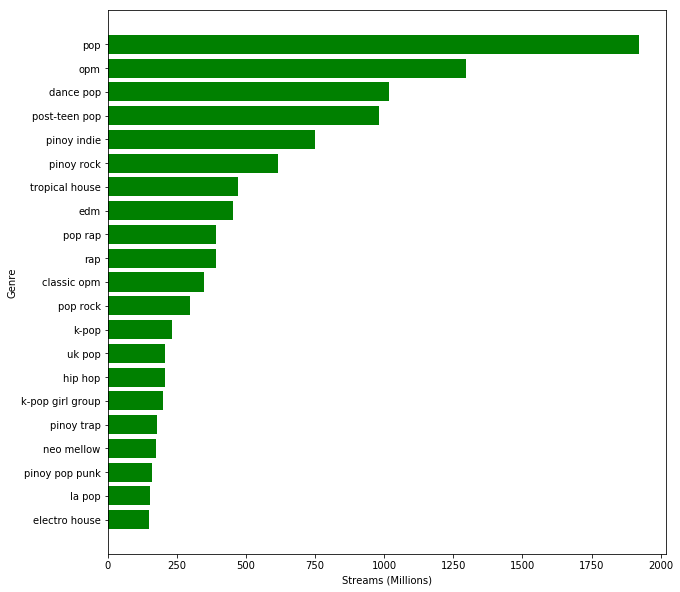

**(10 points)**

In [161]:
y_genre_list =  genre_df["genre"][:20].tolist()
x_stream_list = genre_df["count"][:20].tolist()

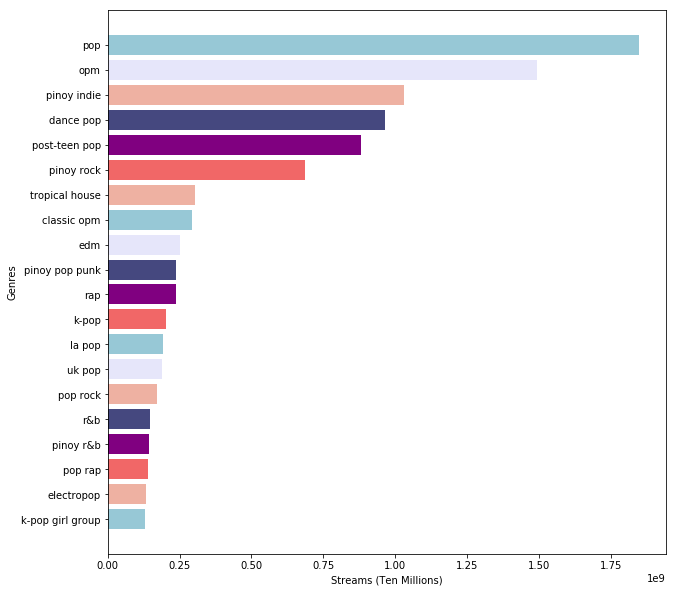

In [163]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

## write your code below

violetish = "#45487F"
hot_pink = "#F16767"
beigeish = "#FFF0DE"
pastel_pink = "#EEB1A2"
sky_blue = "#97C8D6"

colors = [sky_blue, "lavender", pastel_pink, violetish ,"purple", hot_pink, pastel_pink, sky_blue,"lavender", violetish,"purple", hot_pink]


ax.set_ylabel("Genres")
ax.set_xlabel("Streams (Ten Millions)")
ax.barh(width = x_stream_list, y = y_genre_list, color=[c for c in colors])

plt.gca().invert_yaxis()

#### 4b) Who are the most popular Artists in the Philippines (as measured by stream count) in June 2019?

Plot a **horizontal bar**.

The resulting plot should look something like this:

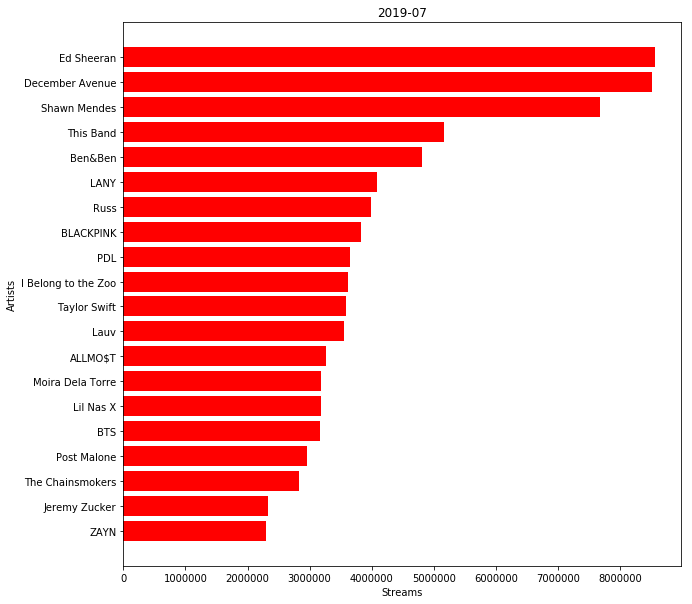

**(10 points)**

In [164]:
bar_artist = artist_streams_df.loc[artist_streams_df.loc[:,"chart_month"]=="2019-06",:].sort_values("Streams", ascending=False)
bar_artist

Artist chart_month   Streams
130      December Avenue     2019-06  15624715
131            BLACKPINK     2019-06  10411039
132            This Band     2019-06   9805591
133           Ed Sheeran     2019-06   9647703
134              Ben&Ben     2019-06   9177393
135         Shawn Mendes     2019-06   7598890
136                 LANY     2019-06   7534361
137                 Lauv     2019-06   7452643
138                 Russ     2019-06   7115369
139                  PDL     2019-06   7039182
140  I Belong to the Zoo     2019-06   7018243
141              ALLMO$T     2019-06   6943650
142         Taylor Swift     2019-06   6769565
143                 ZAYN     2019-06   5999001
144                  BTS     2019-06   5577519
145     The Chainsmokers     2019-06   5145115
146          Post Malone     2019-06   4658157
147               Khalid     2019-06   4587139
148            Lil Nas X     2019-06   4553253
149        Jeremy Zucker     2019-06   4467471
150        Ariana Grande     2019-06   4271544
151     Moira Dela Torre     2019-06   4136479
152           Marshmello     2019-06   3607260
153                Bazzi     2019-06   3570611
154            Sam Smith     2019-06   3558889
155           Katy Perry     2019-06   3376629
156            Callalily     2019-06   3356021
157       Darren Espanto     2019-06   3249353
158               Halsey     2019-06   2983297
159         Lukas Graham     2019-06   2914157
..                   ...         ...       ...
241            Pricetagg     2019-06    664478
242         Selena Gomez     2019-06    661921
243                  EXO     2019-06    661162
244          James Blunt     2019-06    659206
245        Ronan Keating     2019-06    659029
246       Brian McKnight     2019-06    639635
247   Tyler, The Creator     2019-06    544746
248          Snow Patrol     2019-06    485063
249                Drake     2019-06    471737
250         Mena Massoud     2019-06    441635
251                 Kygo     2019-06    416186
252          Miley Cyrus     2019-06    402717
253            Lil Eddie     2019-06    389043
254           Young Thug     2019-06    345195
255      Jesse McCartney     2019-06    335142
256            Freestyle     2019-06    329482
257                Imago     2019-06    322594
258          TJ Monterde     2019-06    315053
259             Coldplay     2019-06    311293
260           Red Velvet     2019-06    260999
261          Alan Menken     2019-06    204519
262            Ali Gatie     2019-06    189311
263                Mabel     2019-06    187629
264            Sam Feldt     2019-06    176597
265               Alesso     2019-06    175800
266               LEE HI     2019-06    165186
267               Tiësto     2019-06    163239
268           Will Smith     2019-06    160669
269  Julie Anne San Jose     2019-06    160455
270  Panic! At The Disco     2019-06    157775

[141 rows x 3 columns]

In [165]:
label = bar_artist.loc[:,"Artist"].tolist()
label = label[:20]
label

['December Avenue',
 'BLACKPINK',
 'This Band',
 'Ed Sheeran',
 'Ben&Ben',
 'Shawn Mendes',
 'LANY',
 'Lauv',
 'Russ',
 'PDL',
 'I Belong to the Zoo',
 'ALLMO$T',
 'Taylor Swift',
 'ZAYN',
 'BTS',
 'The Chainsmokers',
 'Post Malone',
 'Khalid',
 'Lil Nas X',
 'Jeremy Zucker']

In [166]:
values = bar_artist.loc[:,"Streams"].tolist()
values = values[:20]
values

[15624715,
 10411039,
 9805591,
 9647703,
 9177393,
 7598890,
 7534361,
 7452643,
 7115369,
 7039182,
 7018243,
 6943650,
 6769565,
 5999001,
 5577519,
 5145115,
 4658157,
 4587139,
 4553253,
 4467471]

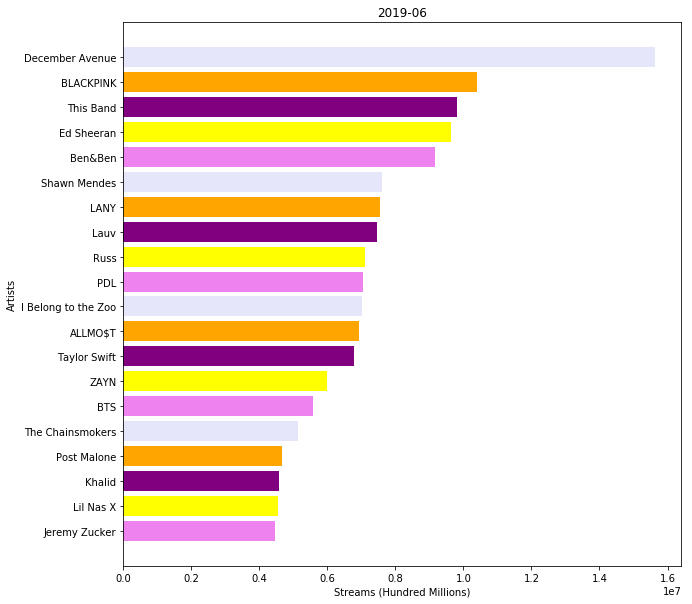

In [167]:
import matplotlib.pyplot as plt

chart_month = "2019-06"

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

## write your code below

colors = ["lavender","orange","purple","yellow","violet","lavender","orange","purple","yellow","violet","lavender","orange","purple","yellow","violet","lavender","orange","purple","yellow","violet"]

ax.set_title("2019-06")
ax.set_ylabel("Artists")
ax.set_xlabel("Streams (Hundred Millions)")
ax.barh(width = values, y = label, color=[c for c in colors])

plt.gca().invert_yaxis()



#### 4c) What are the average features of the top 10 artists by total stream count?

There are no plots nor graphs in this number. Only display the contents of the resulting dataframe.

Revisit the `mean_audio_features_df` dataframe.  

Only include the top 10 artists by total stream count.  

Hint: Use the `total_streams_per_artist_df` dataframe as basis for your filtering.

Hint: Consider using the `DataFrame.isin(...)` method. 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html



**(10 points)**

In [168]:
top_total_streams_per_artist_df = total_streams_per_artist_df[:10]
top_total_streams_per_artist_df

Artist    Streams
80       December Avenue  230648949
164                 LANY  195041003
40               Ben&Ben  140391135
25         Ariana Grande  130212637
278            This Band   97749381
208     Moira Dela Torre   94930807
110  I Belong to the Zoo   90818854
32             BLACKPINK   87164814
88            Ed Sheeran   75345317
228          Post Malone   74120346

In [169]:
ave_merged_df = pd.merge(top_total_streams_per_artist_df, mean_audio_features_df, how="left", left_on=["Artist"], right_on=["Artist"])
ave_merged_df = ave_merged_df.sort_values("Danceability", ascending=False)
ave_merged_df.drop("Streams", axis=1, inplace=True)
ave_merged_df

Artist  Danceability  Liveness  Instrumentalness   Loudness  \
9          Post Malone      0.721909  0.114934      6.471591e-07  -6.567761   
7            BLACKPINK      0.688838  0.180181      1.094808e-04  -3.301558   
3        Ariana Grande      0.685175  0.177576      6.365656e-04  -6.263399   
1                 LANY      0.664252  0.142292      1.171483e-03  -7.953280   
8           Ed Sheeran      0.638448  0.115834      1.919782e-04  -7.071730   
6  I Belong to the Zoo      0.602156  0.190533      0.000000e+00  -8.468911   
2              Ben&Ben      0.516291  0.134859      3.741917e-05  -9.314495   
0      December Avenue      0.502028  0.141317      3.861692e-06  -5.040302   
4            This Band      0.500404  0.113273      3.066717e-04  -9.326040   
5     Moira Dela Torre      0.462023  0.178408      2.048261e-04 -10.057548   

   Speechiness   Valence      Mode  
9     0.084250  0.503568  0.772727  
7     0.088276  0.459912  0.476923  
3     0.100912  0.373224  0.585551  
1     0.081782  0.373729  0.761388  
8     0.044580  0.374960  0.850806  
6     0.029338  0.350533  1.000000  
2     0.035579  0.328333  1.000000  
0     0.030816  0.241929  0.836923  
4     0.034455  0.249172  1.000000  
5     0.035486  0.239077  0.950192

In [81]:
## write your code below
## remnants from a previous test shown below for your reference
## ----------------------



Artist  danceability  liveness  instrumentalness  loudness  \
48   I Belong to the Zoo      0.644144  0.137991          0.000741 -6.630278   
83             This Band      0.629253  0.159965          0.000426 -5.812404   
85       December Avenue      0.628997  0.137791          0.001221 -6.678929   
96            Ed Sheeran      0.625694  0.153446          0.000421 -7.570371   
112     Moira Dela Torre      0.622172  0.145804          0.001324 -7.022598   
113                 LANY      0.622152  0.134362          0.000711 -7.016731   
155            BLACKPINK      0.610681  0.139826          0.000897 -7.183369   
166        Ariana Grande      0.607673  0.151281          0.000641 -7.143418   
168          Post Malone      0.607415  0.134897          0.000432 -7.277227   
183              Ben&Ben      0.600874  0.133243          0.000565 -6.575432   

     speechiness   valence      mode  
48      0.063766  0.407811  0.811111  
83      0.102412  0.443444  0.737374  
85      0.063375  0.409468  0.781538  
96      0.056863  0.406998  0.838710  
112     0.063144  0.409754  0.793103  
113     0.068505  0.412306  0.778742  
155     0.061725  0.402831  0.819231  
166     0.070895  0.392934  0.787072  
168     0.068336  0.407632  0.772727  
183     0.084477  0.412601  0.752427

#### 4d) Which are the 10 most danceable artists who have made it in the Top 200 charts?

Plot a horizontal bar graph of these top 10 Danceable Artists.

Your resulting plot should look something like this.

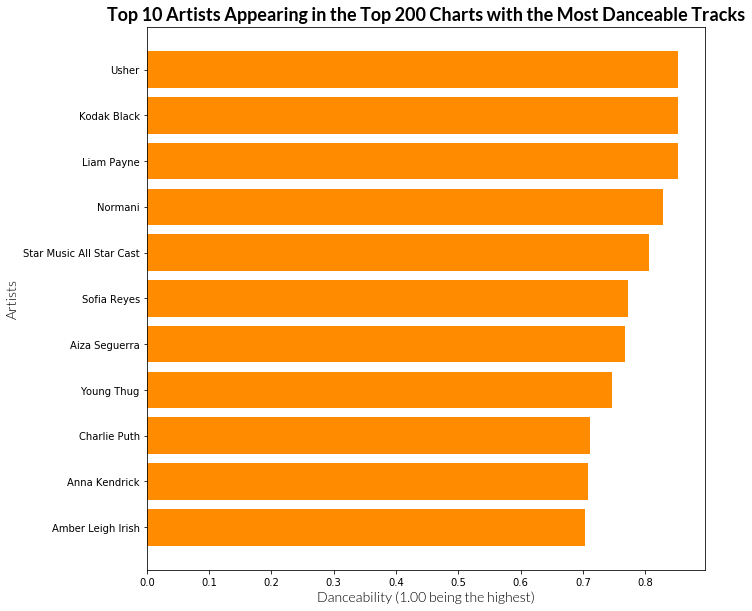

**(10 points)**

In [170]:
bar_dance = mean_audio_features_df.loc[:,["Artist", "Danceability"]].sort_values("Danceability", ascending=False)
bar_dance

Artist  Danceability
0                 Lavaado      0.939000
1                 6ix9ine      0.903250
2              Kanye West      0.901000
3                Al James      0.890042
4                 Normani      0.890000
5               Meek Mill      0.889000
6                   Arvey      0.889000
7                 ALLMO$T      0.887191
8                    Tyga      0.884000
9                  Eminem      0.881182
10            King Badger      0.875000
11             Liam Payne      0.874000
12              Lil Nas X      0.861469
13            Kodak Black      0.861000
14           Charlie Puth      0.856000
15             6cyclemind      0.853000
16               DJ Snake      0.841000
17              21 Savage      0.837000
18                J. Cole      0.837000
19                    CLR      0.835000
20            Shanti Dope      0.830892
21             John Mayer      0.828000
22           Andy Grammer      0.828000
23              Bad Bunny      0.817000
24           Kyle Juliano      0.816000
25           Dominic Fike      0.815000
26         Jonas Brothers      0.811133
27                  Drake      0.808368
28           Travis Scott      0.805865
29         Julia Michaels      0.803000
..                    ...           ...
275   Secondhand Serenade      0.433000
276          James Arthur      0.427920
277                Sigala      0.423000
278       Christina Perri      0.421000
279       Imagine Dragons      0.415500
280         Janine Teñoso      0.413000
281            Will Smith      0.409000
282        Sarah Geronimo      0.406395
283     Rex Orange County      0.399000
284          Mena Massoud      0.395000
285  the bird and the bee      0.385000
286         Join The Club      0.374000
287          Mariah Carey      0.363875
288          JM De Guzman      0.351000
289           Calum Scott      0.343764
290               Beyoncé      0.337000
291           John Lennon      0.328000
292         Nat King Cole      0.319000
293            Mayonnaise      0.318262
294           Bing Crosby      0.317000
295     The Goo Goo Dolls      0.315000
296              John Roa      0.313000
297          Kina Grannis      0.293176
298         Anna Kendrick      0.290000
299       Reneé Dominique      0.288000
300          Keala Settle      0.284000
301          Loren Allred      0.277000
302           Alan Menken      0.266000
303           Ziv Zaifman      0.265000
304         Andy Williams      0.240000

[305 rows x 2 columns]

In [171]:
y_artist = bar_dance.loc[:,"Artist"].tolist()
y_artist = y_artist[:10]
y_artist

['Lavaado',
 '6ix9ine',
 'Kanye West',
 'Al James',
 'Normani',
 'Meek Mill',
 'Arvey',
 'ALLMO$T',
 'Tyga',
 'Eminem']

In [172]:
x_dance = bar_dance.loc[:,"Danceability"].tolist()
x_dance = x_dance[:10]
x_dance

[0.939,
 0.9032500000000001,
 0.9009999999999999,
 0.8900416666666672,
 0.89,
 0.8890000000000001,
 0.889,
 0.8871914893617023,
 0.8840000000000001,
 0.8811818181818182]

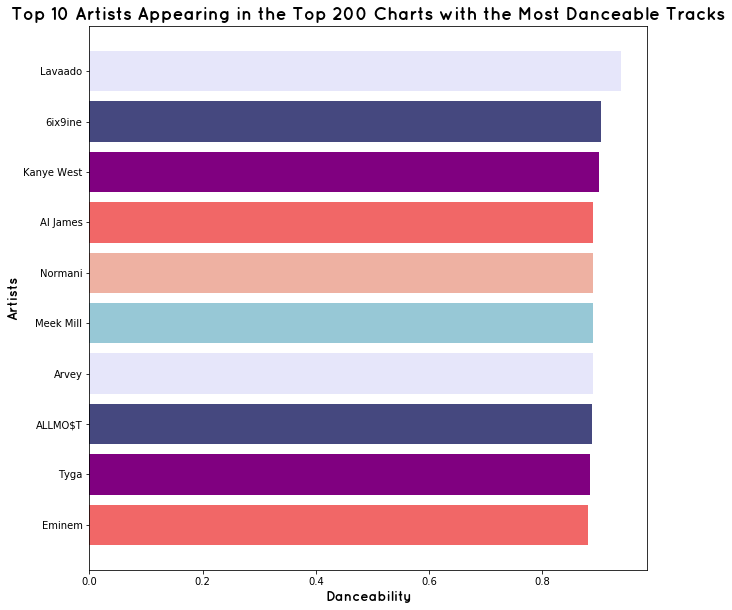

In [173]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

title_font = {"fontweight":"bold", "fontfamily":"Quicksand", "fontsize":18}
label_font = {"fontfamily":"Quicksand", "fontsize":14}

## write code below
## -----------------

violetish = "#45487F"
hot_pink = "#F16767"
beigeish = "#FFF0DE"
pastel_pink = "#EEB1A2"
sky_blue = "#97C8D6"

colors = ["lavender", violetish ,"purple", hot_pink, pastel_pink, sky_blue,"lavender", violetish,"purple", hot_pink]

ax.set_title("Top 10 Artists Appearing in the Top 200 Charts with the Most Danceable Tracks", **title_font)
ax.set_ylabel("Artists", **label_font)
ax.set_xlabel("Danceability", **label_font)
ax.barh(width = x_dance, y = y_artist, color=[c for c in colors])

plt.gca().invert_yaxis()


#### 4e) Staying power

No plots/graphs for this question. Simply dump the output below the cell containing your code.

Which artists stayed for 52 weeks in the charts? 

Prepare a new dataframe `artist_stay_df` that shows the number of periods (weeks) each Artist was included in the Top 200 Charts.

**Hint:** It's possible that one artist can have several tracks in the Top 200 all at at the same time, but we need to count this stay only once. Use `DataFrame.drop_duplicates()` to get unique rows.

Also try to sort by "weeks" in descending order.

**(10 points)**

In [174]:
power_df = df.loc[:,["Artist","begin_date"]]
power_df = power_df.drop_duplicates()
power_df

Artist  begin_date
0                  Drake  2018-08-03
1               Maroon 5  2018-08-03
2           IV Of Spades  2018-08-03
3                   LANY  2018-08-03
4                Ben&Ben  2018-08-03
5        December Avenue  2018-08-03
6          Janine Teñoso  2018-08-03
7             Anne-Marie  2018-08-03
8              DJ Khaled  2018-08-03
9              BLACKPINK  2018-08-03
10      Moira Dela Torre  2018-08-03
11            Jonas Blue  2018-08-03
12          benny blanco  2018-08-03
14         Ariana Grande  2018-08-03
15              MOMOLAND  2018-08-03
17                  Zedd  2018-08-03
18         Martin Garrix  2018-08-03
19             Lil Dicky  2018-08-03
20            Bebe Rexha  2018-08-03
21           Shanti Dope  2018-08-03
22          Selena Gomez  2018-08-03
23              Dua Lipa  2018-08-03
25            Ed Sheeran  2018-08-03
27        Up Dharma Down  2018-08-03
28           OneRepublic  2018-08-03
29          Clean Bandit  2018-08-03
32   5 Seconds of Summer  2018-08-03
33                  KYLE  2018-08-03
34                  Kygo  2018-08-03
35              John Roa  2018-08-03
..                   ...         ...
142                 Nina  2018-09-14
143       Meghan Trainor  2018-09-14
144            Freestyle  2018-09-14
145            Lifehouse  2018-09-14
147             The 1975  2018-09-14
149           Mayonnaise  2018-09-14
152               Alesso  2018-09-14
158  5 Seconds of Summer  2018-09-14
160     Hailee Steinfeld  2018-09-14
161           6cyclemind  2018-09-14
163              Gryffin  2018-09-14
164  Julie Anne San Jose  2018-09-14
169              Because  2018-09-14
170      Christina Perri  2018-09-14
171                 iKON  2018-09-14
173           Bruno Mars  2018-09-14
174        Martin Garrix  2018-09-14
175               *NSYNC  2018-09-14
176     Katharine McPhee  2018-09-14
179            Howie Day  2018-09-14
180     Yeng Constantino  2018-09-14
181               Chlara  2018-09-14
182  Secondhand Serenade  2018-09-14
186          Loud Luxury  2018-09-14
187         XXXTENTACION  2018-09-14
188      Vanessa Carlton  2018-09-14
190          Snow Patrol  2018-09-14
194          Jess Glynne  2018-09-14
195                R3HAB  2018-09-14
199                TWICE  2018-09-14

[6468 rows x 2 columns]

In [175]:
artist_stay_df = power_df.groupby("Artist", as_index=False).count().sort_values("begin_date", ascending=False)
artist_stay_df = artist_stay_df.loc[artist_stay_df.loc[:,"begin_date"]==52,:]
artist_stay_df.columns = ["Artist","Weeks"]
artist_stay_df

Artist  Weeks
40              Ben&Ben     52
57            Callalily     52
105              H.E.R.     52
257    Silent Sanctuary     52
37                Bazzi     52
80      December Avenue     52
253         Shanti Dope     52
252        Selena Gomez     52
164                LANY     52
249           Sam Smith     52
245                 SUD     52
167                Lauv     52
236             Rihanna     52
228         Post Malone     52
224    Parokya Ni Edgar     52
58          Calum Scott     52
261        South Border     52
92          Eraserheads     52
188                MYMP     52
221     Orange & Lemons     52
213               Ne-Yo     52
132            John Roa     52
209          Moonstar88     52
208    Moira Dela Torre     52
88           Ed Sheeran     52
195         Mark Carpio     52
85             Dua Lipa     52
205  Michael Pangilinan     52
75       Darren Espanto     52
197            Maroon 5     52
32            BLACKPINK     52
198          Marshmello     52
106    Hailee Steinfeld     52
121        James Arthur     52
112        IV Of Spades     52
297           Zac Efron     52
155              Khalid     52
299                Zedd     52
301        benny blanco     52
275  The Pussycat Dolls     52
274   The Goo Goo Dolls     52
24           Anne-Marie     52
25        Ariana Grande     52
273    The Chainsmokers     52
123       Janine Teñoso     52
125          Jason Mraz     52
107                Hale     52
285      Up Dharma Down     52

In [85]:
## write code below
## remnants from a previous test shown below for your reference
## ---------------------









Artist  weeks
40              Ben&Ben     52
57            Callalily     52
105              H.E.R.     52
257    Silent Sanctuary     52
37                Bazzi     52
80      December Avenue     52
253         Shanti Dope     52
252        Selena Gomez     52
164                LANY     52
249           Sam Smith     52
245                 SUD     52
167                Lauv     52
236             Rihanna     52
228         Post Malone     52
224    Parokya Ni Edgar     52
58          Calum Scott     52
261        South Border     52
92          Eraserheads     52
188                MYMP     52
221     Orange & Lemons     52
213               Ne-Yo     52
132            John Roa     52
209          Moonstar88     52
208    Moira Dela Torre     52
88           Ed Sheeran     52
195         Mark Carpio     52
85             Dua Lipa     52
205  Michael Pangilinan     52
75       Darren Espanto     52
197            Maroon 5     52
32            BLACKPINK     52
198          Marshmello     52
106    Hailee Steinfeld     52
121        James Arthur     52
112        IV Of Spades     52
297           Zac Efron     52
155              Khalid     52
299                Zedd     52
301        benny blanco     52
275  The Pussycat Dolls     52
274   The Goo Goo Dolls     52
24           Anne-Marie     52
25        Ariana Grande     52
273    The Chainsmokers     52
123       Janine Teñoso     52
125          Jason Mraz     52
107                Hale     52
285      Up Dharma Down     52